# Plot Code Base

### Scatter plot

In [5]:
# Pandas for managing datasets
import pandas as pd
df = pd.read_csv('Pokemon.csv', encoding = "ISO-8859-1", index_col=0)

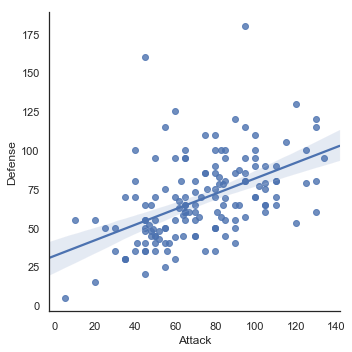

In [6]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

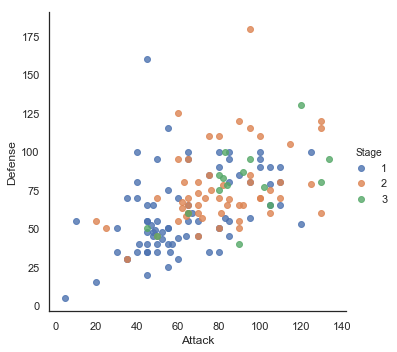

In [7]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

(0, 141.99764013468427)

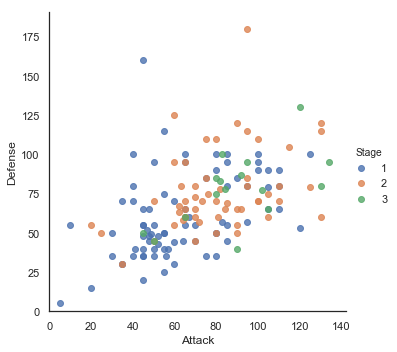

In [8]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

### Boxplot

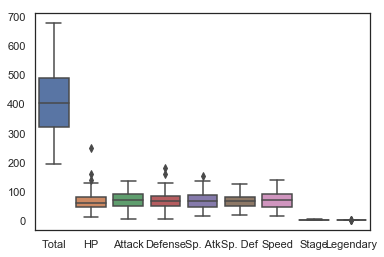

In [9]:
# Boxplot
sns.boxplot(data=df)

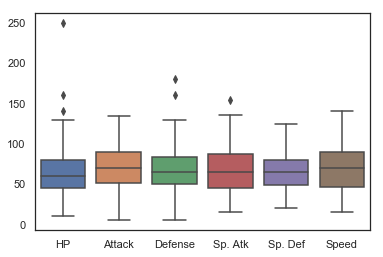

In [10]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

### Violinplot

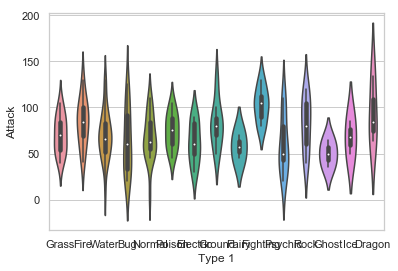

In [11]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

In [12]:
#Custom color palette
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

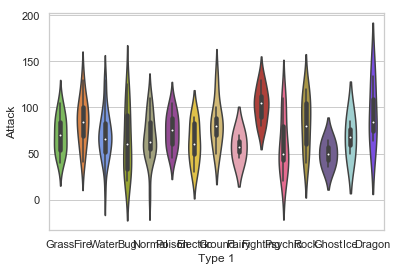

In [13]:
#using custom color palette
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

### Heatmap

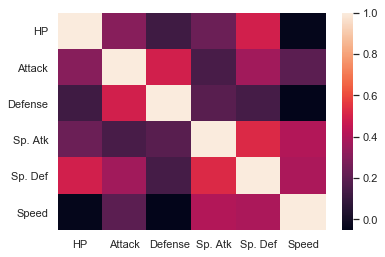

In [14]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

### Histogram

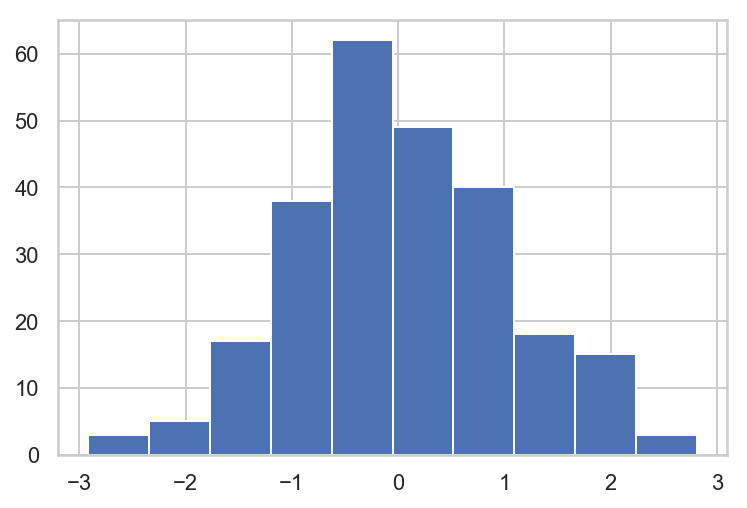

In [17]:
import numpy as np
%config InlineBackend.figure_format = 'retina'

np.random.seed(3)
x = np.random.randn(250)
plt.hist(x);

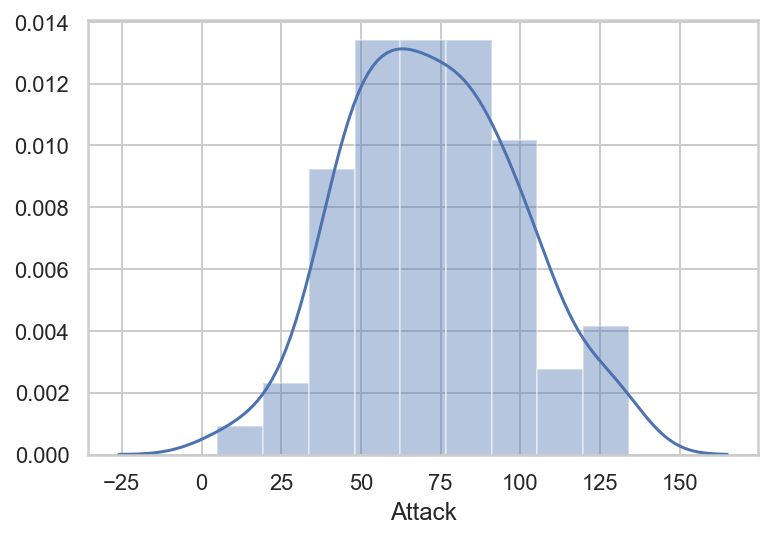

In [18]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

### Bar plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

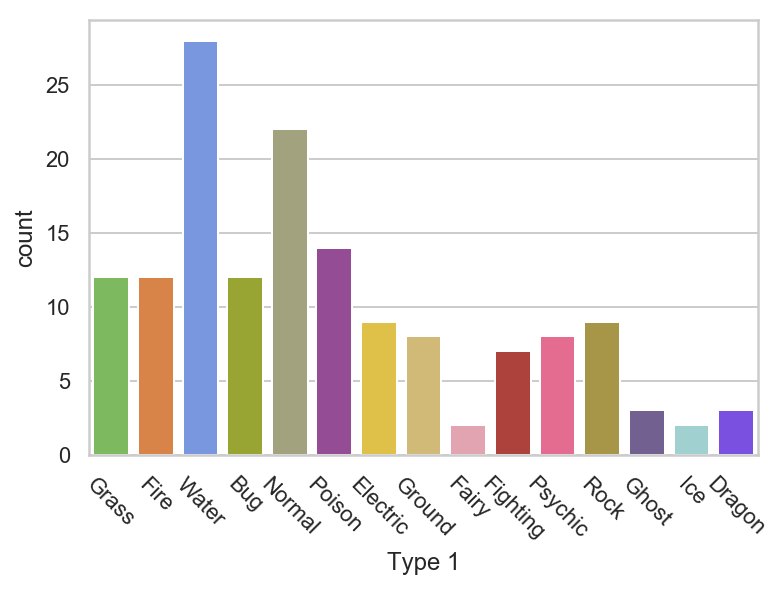

In [19]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Joint Distribution Plot

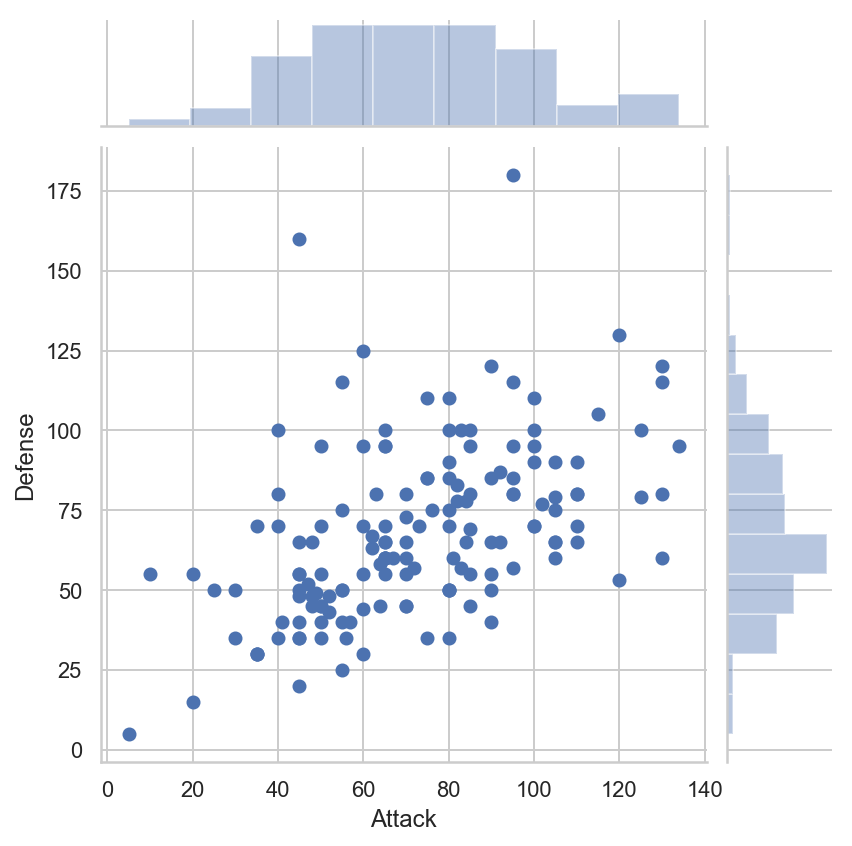

In [20]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

In [26]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("iris.csv") # the iris dataset is now a Pandas DataFrame

#create id column based on index
iris['id'] = iris.index
# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species,id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,3
4,5.0,3.6,1.4,0.2,setosa,4


### Kdeplot

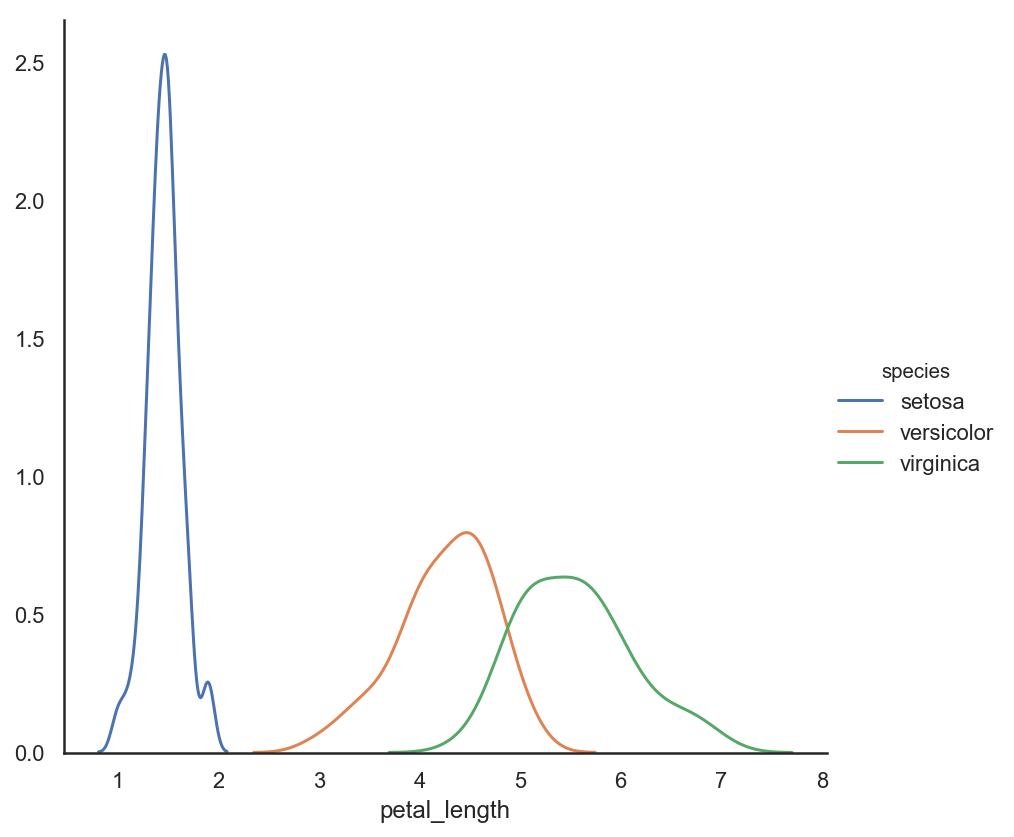

In [28]:
sns.FacetGrid(iris, hue="species", size=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

### Pairplot

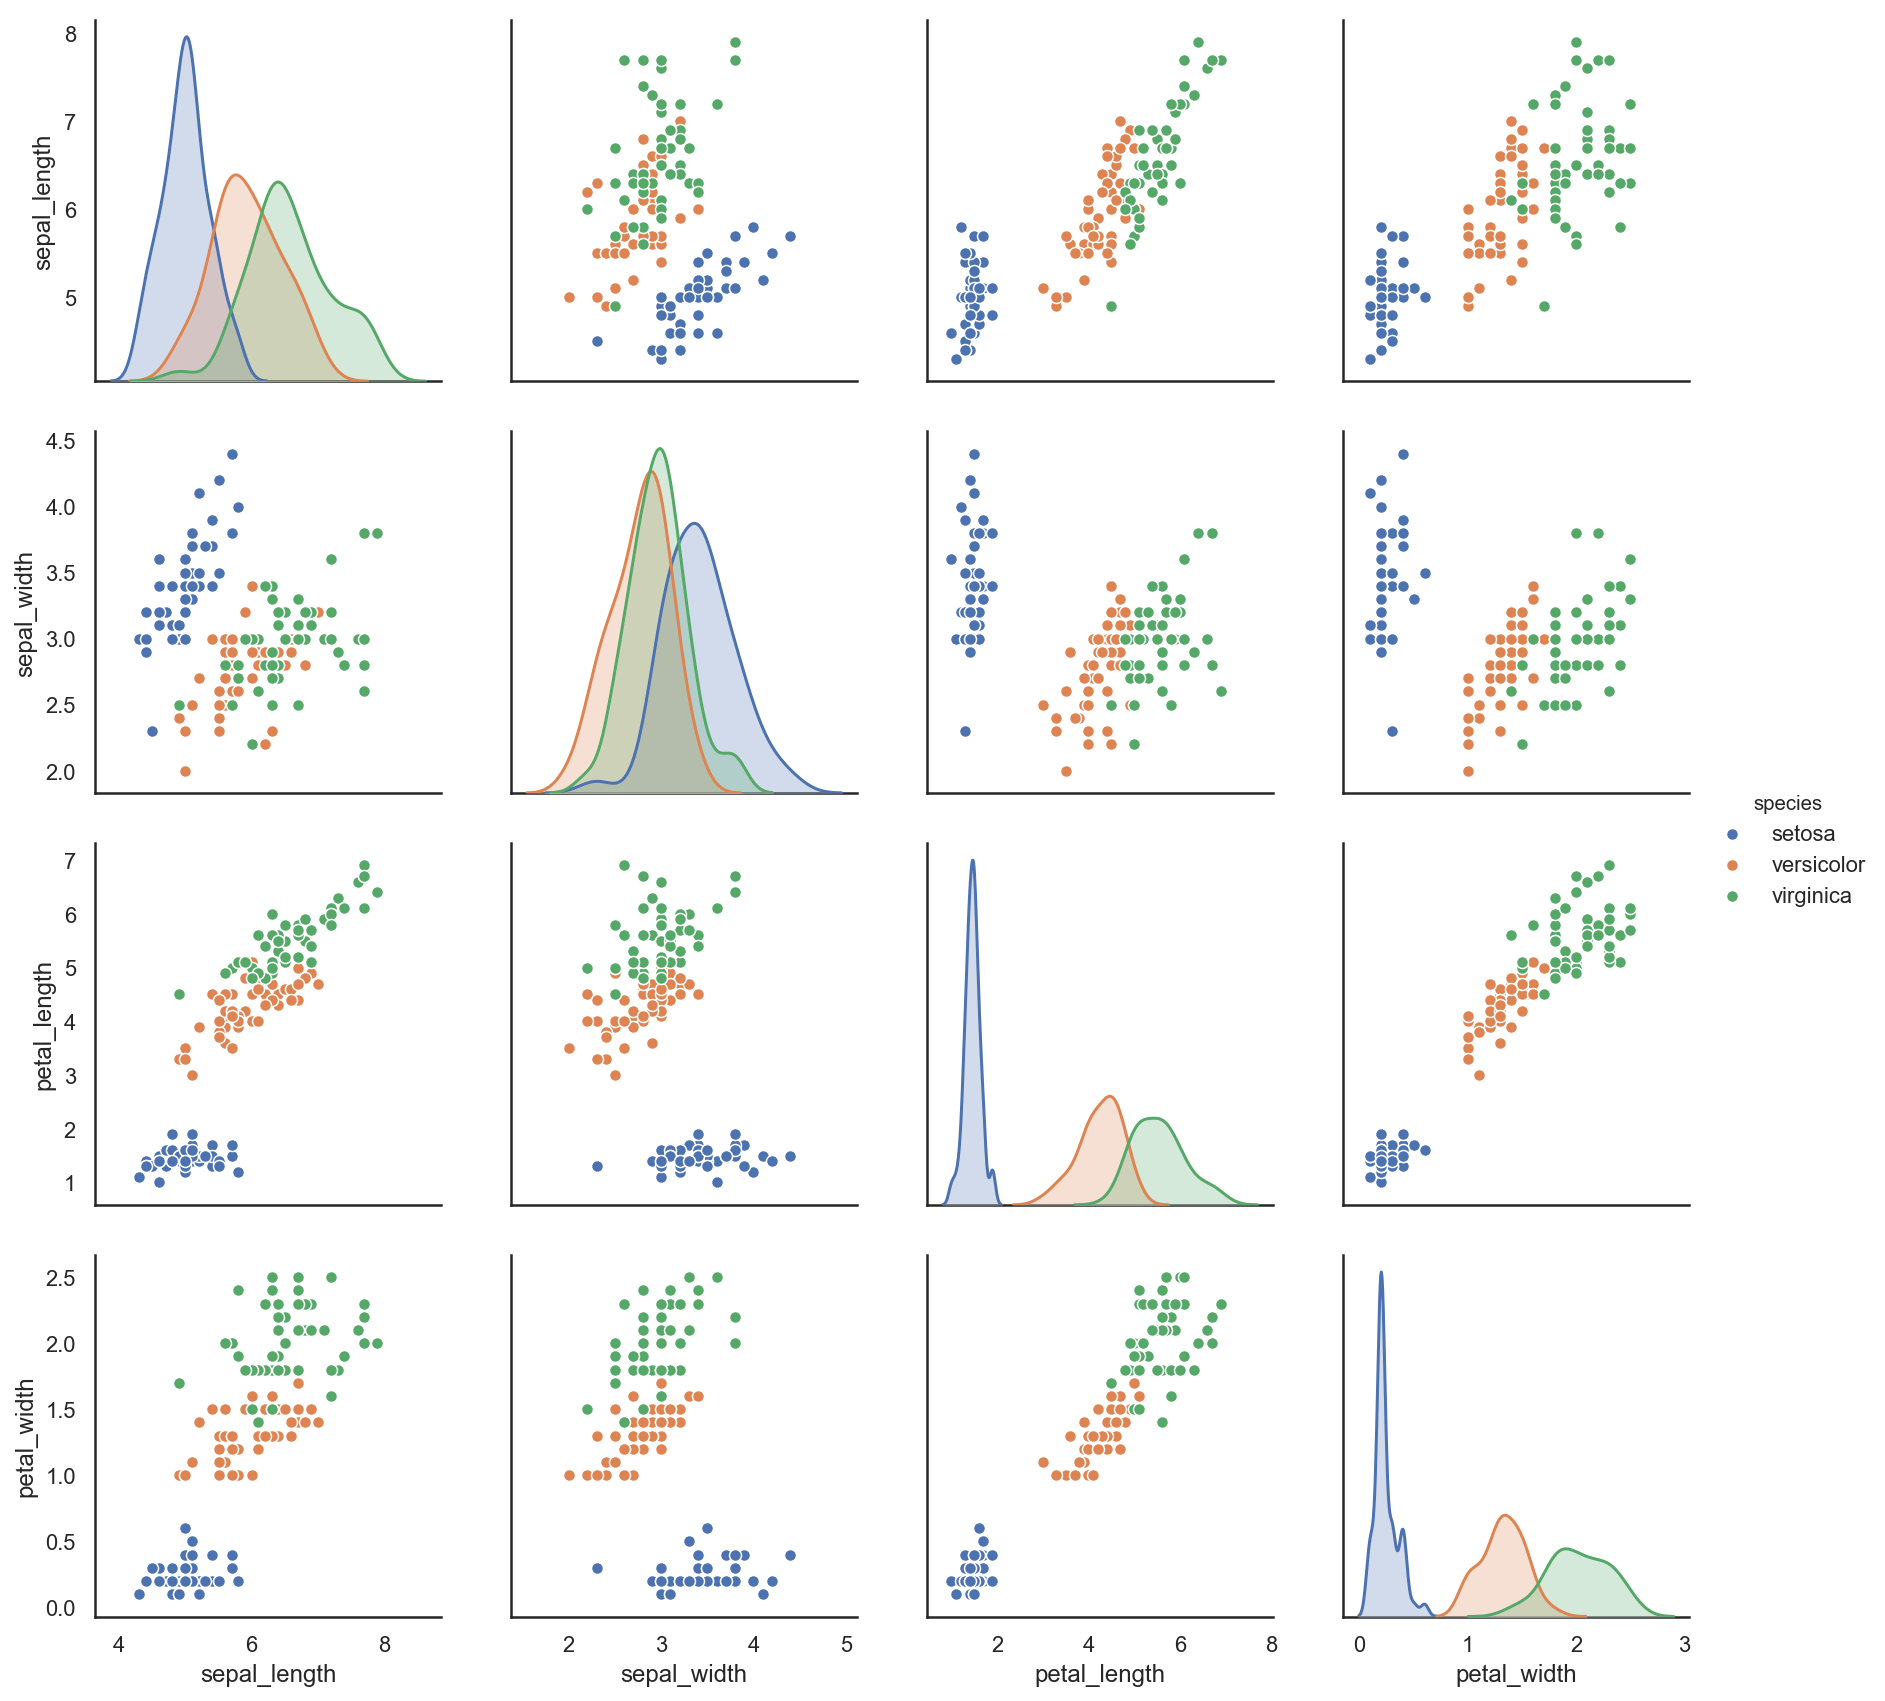

In [30]:
sns.pairplot(iris.drop("id", axis=1), hue="species", size=3)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [35]:
df = pd.read_csv('Music Sales.csv', index_col=None)

In [36]:
df.shape

(2143, 25)

## Most popular genre in Europe and Asia.

In [37]:
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()

In [38]:
df_EA.shape

(1089, 25)

In [39]:
df_genre = df_EA.groupby(['Genre'])['Quantity'].sum().reset_index()
df_genre.sort_values(by=['Quantity'], ascending=False, inplace=True)

## Revised Chart

Text(0.5, 1.0, 'Most Popular Genre in Asia and Europe')

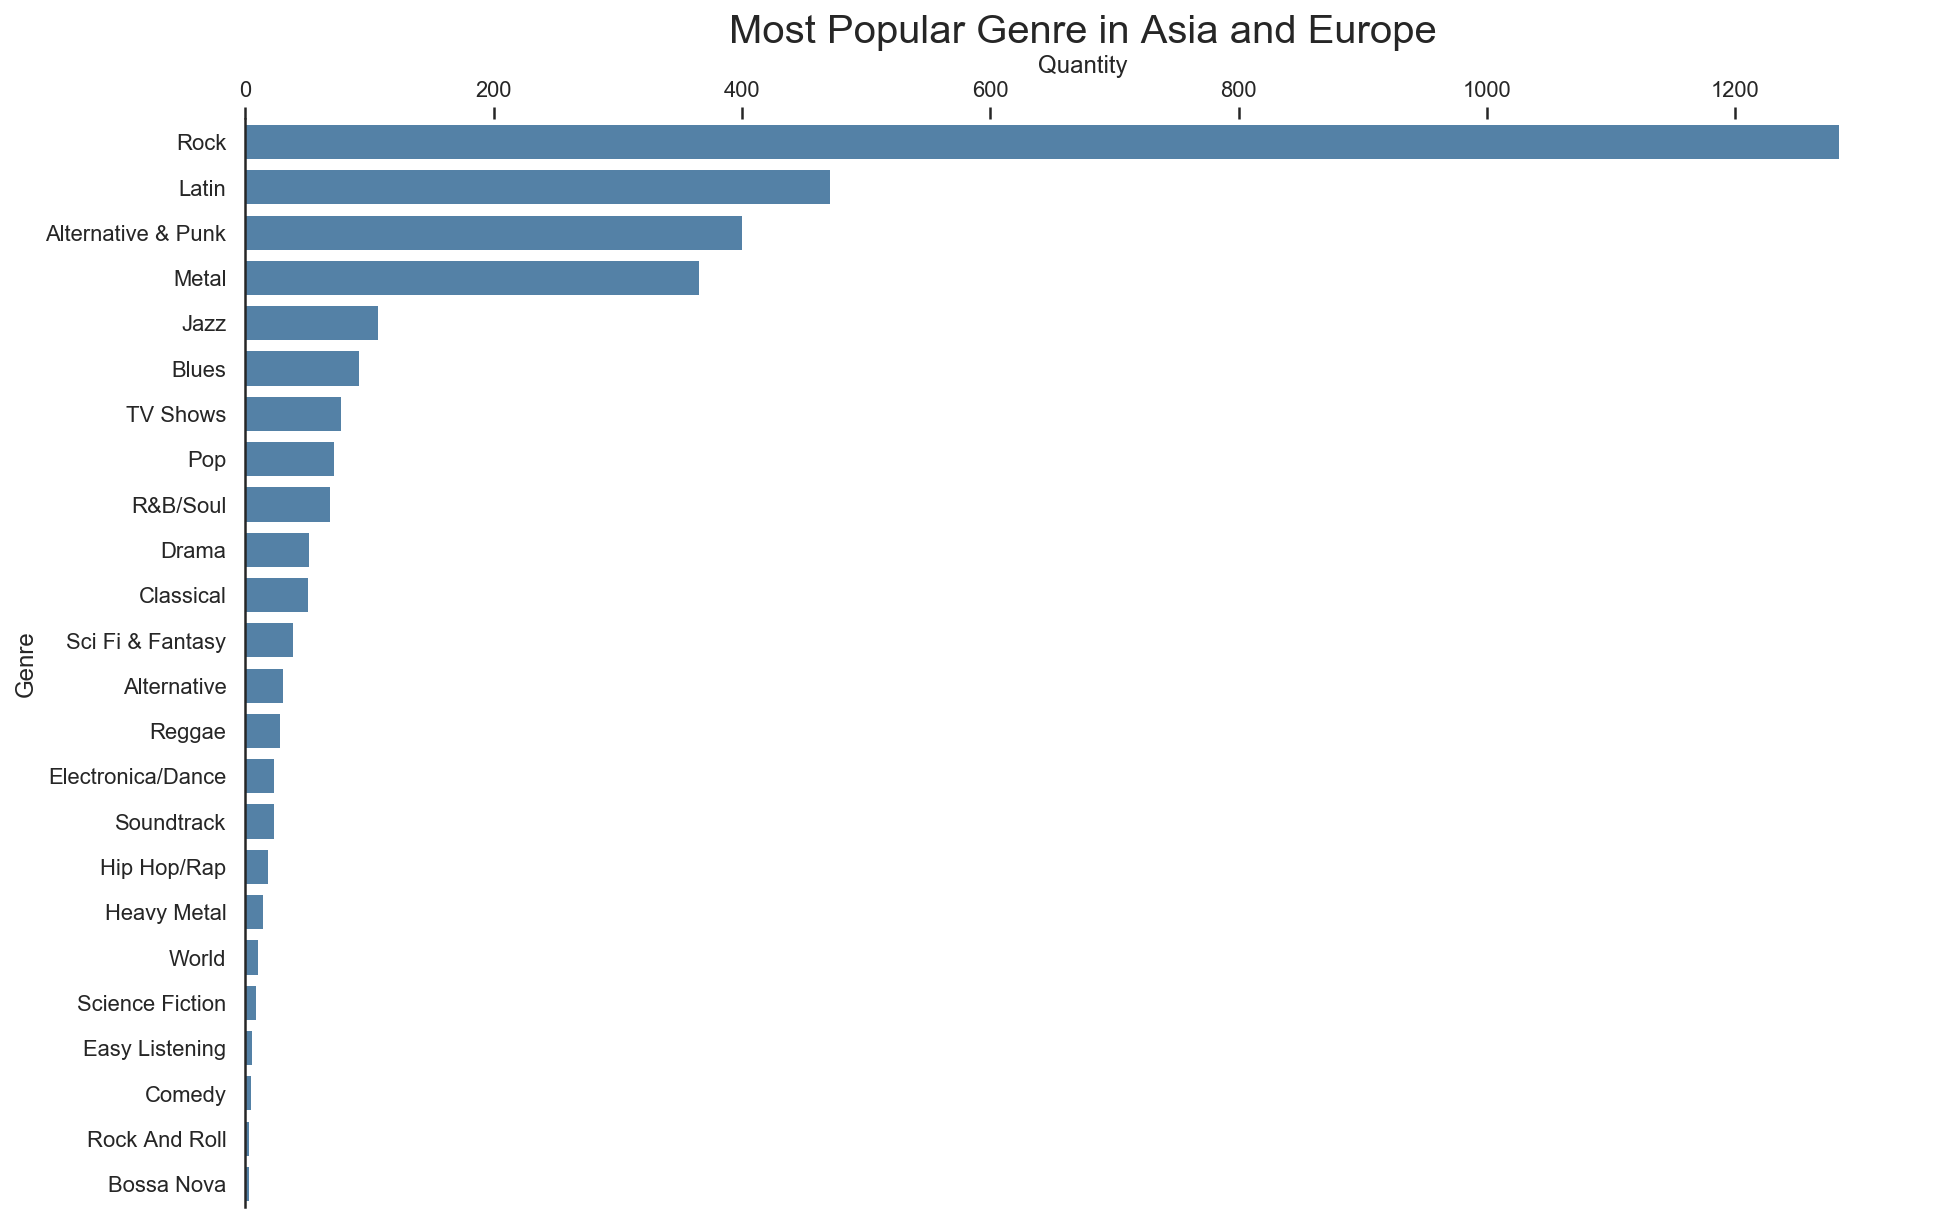

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
ax = fig.gca()
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
sns.despine(bottom=True)
sns.barplot(y='Genre', x='Quantity', data=df_genre, color = 'steelblue', ax=ax)
ax.set_title('Most Popular Genre in Asia and Europe', size=20)

## Top 20 Artists in Europe and Asia.

In [50]:
# get the rank of artists by quantity
df_rank = df_EA.groupby(['Artist'])['Quantity'].sum().reset_index()
df_rank['Rank'] = df_rank['Quantity'].rank(method='dense', ascending=False) 

In [51]:
# get the quantity by artists and genre
# append the rank of artists
df_rank_genre = df_EA.groupby(['Artist', 'Genre'])['Quantity'].sum().reset_index()
df_rank_genre=pd.merge(df_rank_genre, df_rank[['Artist', 'Rank']], on='Artist', how='left')
df_rank_genre.sort_values(by='Rank', inplace=True)

## Revised Chart

Text(0.5, 0, 'Quantity')

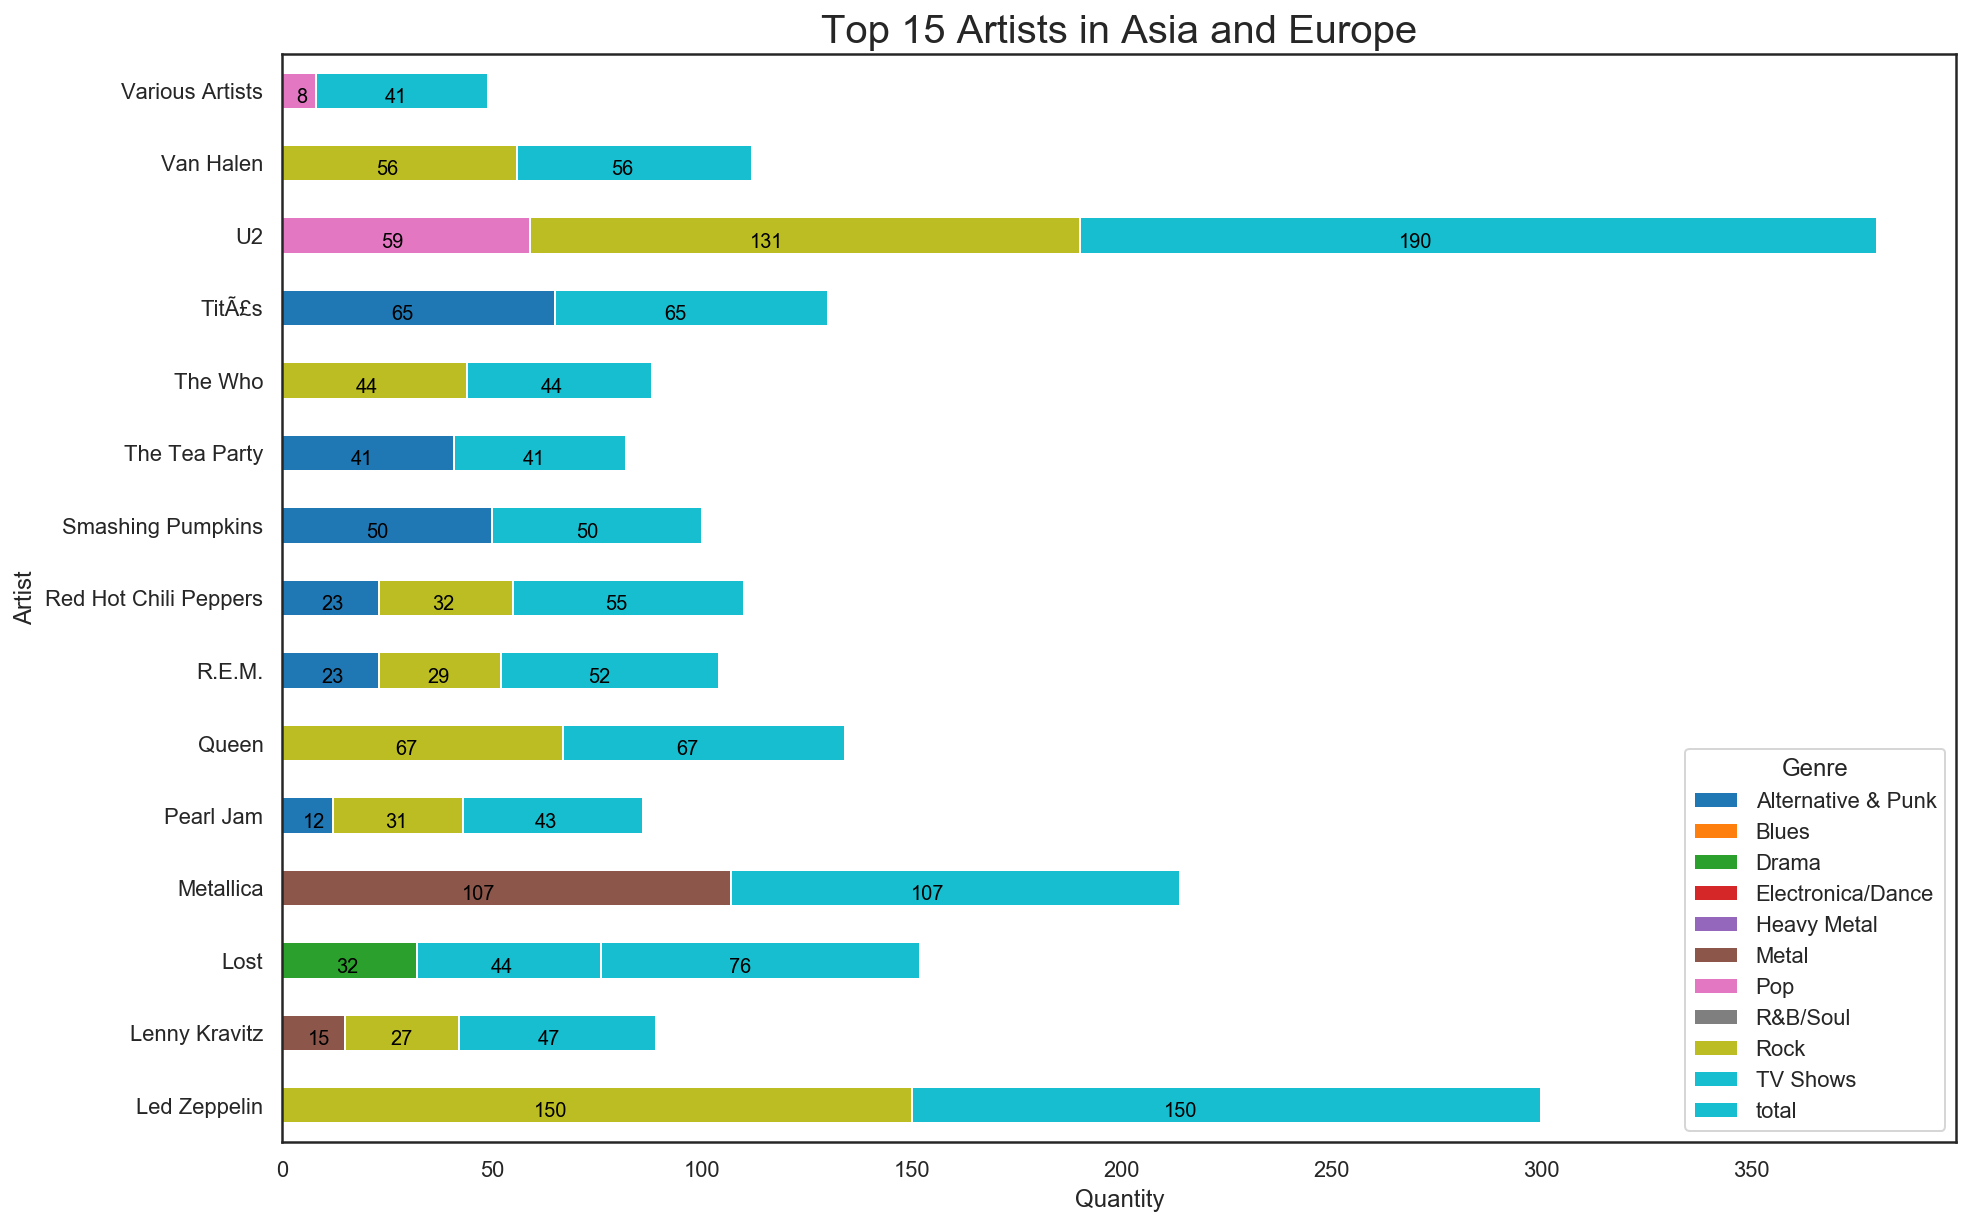

In [52]:
df_top15 = df_top20.tail(15)
df_top15.drop(['Latin', 'Reggae', 'Sci Fi & Fantasy', 'Soundtrack'], axis=1, inplace=True)

ax2 = df_top15.plot.barh(stacked=True, figsize=(15, 10), cmap=plt.cm.get_cmap('tab10'))
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    if width > 0:
        ax2.annotate(f'{width:.0f}', (p.get_x()+0.40*width,
                                     p.get_y()+.17*height), color='black', fontsize=10)
plt.title('Top 15 Artists in Asia and Europe', size=20)
plt.xlabel('Quantity')

## Rock vs. Alternative and Punk vs. Heavy Metal.

In [53]:
# format date to month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_year_month'] = pd.to_datetime(df['InvoiceDate']).dt.strftime("%Y-%m")

In [54]:
# subset the data needed for the plot
df_3genres=df[df['Genre'].isin(['Alternative & Punk','Heavy Metal', 'Rock'])]

In [55]:
# get the summary
df_3genres_summary = df_3genres.groupby(['Genre', 'InvoiceDate_year_month'])['Sales'].sum().reset_index()

In [56]:
# set the template
t = pd.date_range('2008-01-01', '2012-12-31', freq='MS')
order=list(np.arange(60))*3

df_3genres_template=pd.DataFrame(list(itertools.product(['Rock','Alternative & Punk','Heavy Metal'], t)), 
                                 columns=['Genre', 'InvoiceDate'])
df_3genres_template['order']=order
df_3genres_template['InvoiceDate_year_month'] = pd.to_datetime(df_3genres_template['InvoiceDate']).dt.strftime("%Y-%m")

In [57]:
# merge the summary with the template
df_3genres_summary = pd.merge(df_3genres_template, df_3genres_summary, 
                               on=['Genre', 'InvoiceDate_year_month'], how='left')

## Revised Chart

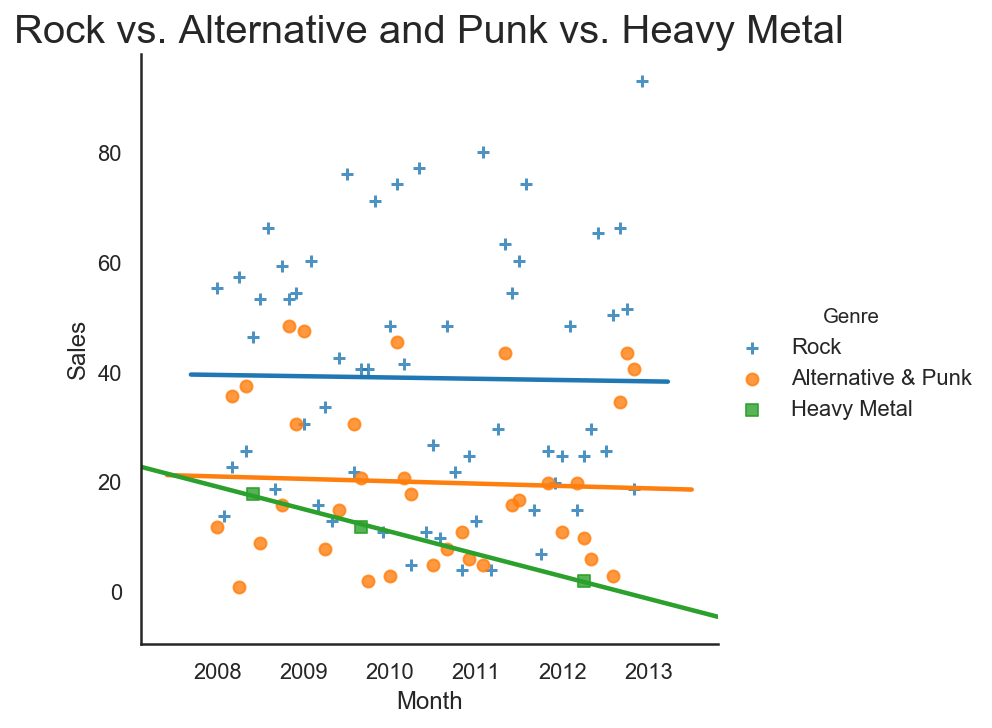

In [58]:
plt.rcParams['figure.figsize'] = (10, 10)
ax=sns.lmplot(x='order', y='Sales', hue='Genre', data=df_3genres_summary, ci=None, markers=['+','o','s'], palette="tab10")
plt.title('Rock vs. Alternative and Punk vs. Heavy Metal', size=20)
plt.xlabel('Month')
ax.set(xticks=np.arange(0,71,12), xticklabels=[2008, 2009, 2010, 2011, 2012, 2013])

In [59]:
df = df[df['Region'].isin(['Europe', 'Asia'])].copy()

In [60]:
df['RSales'] = df.Quantity * df.UnitPrice

In [61]:
plt.rcParams['figure.figsize']=15,15
#punishment data
dfm = df.groupby(["Region", "Country"]).agg({'RSales': 'sum'})
#dfm = df.groupby(["Region", "Country"]).sum()
dfms = dfm.apply(lambda x:
                100 * x / float(x.sum()))
dfms = dfms.reset_index()
df1 = dfms['Region'].reset_index()
df2 = dfms['RSales'].reset_index()
df2= df2.rename(columns={df2.columns[1]: 'RSales'})
df3 = dfms['Country'].map(str) + "\n" + round(dfms['RSales'], 2).map(str) + "%"

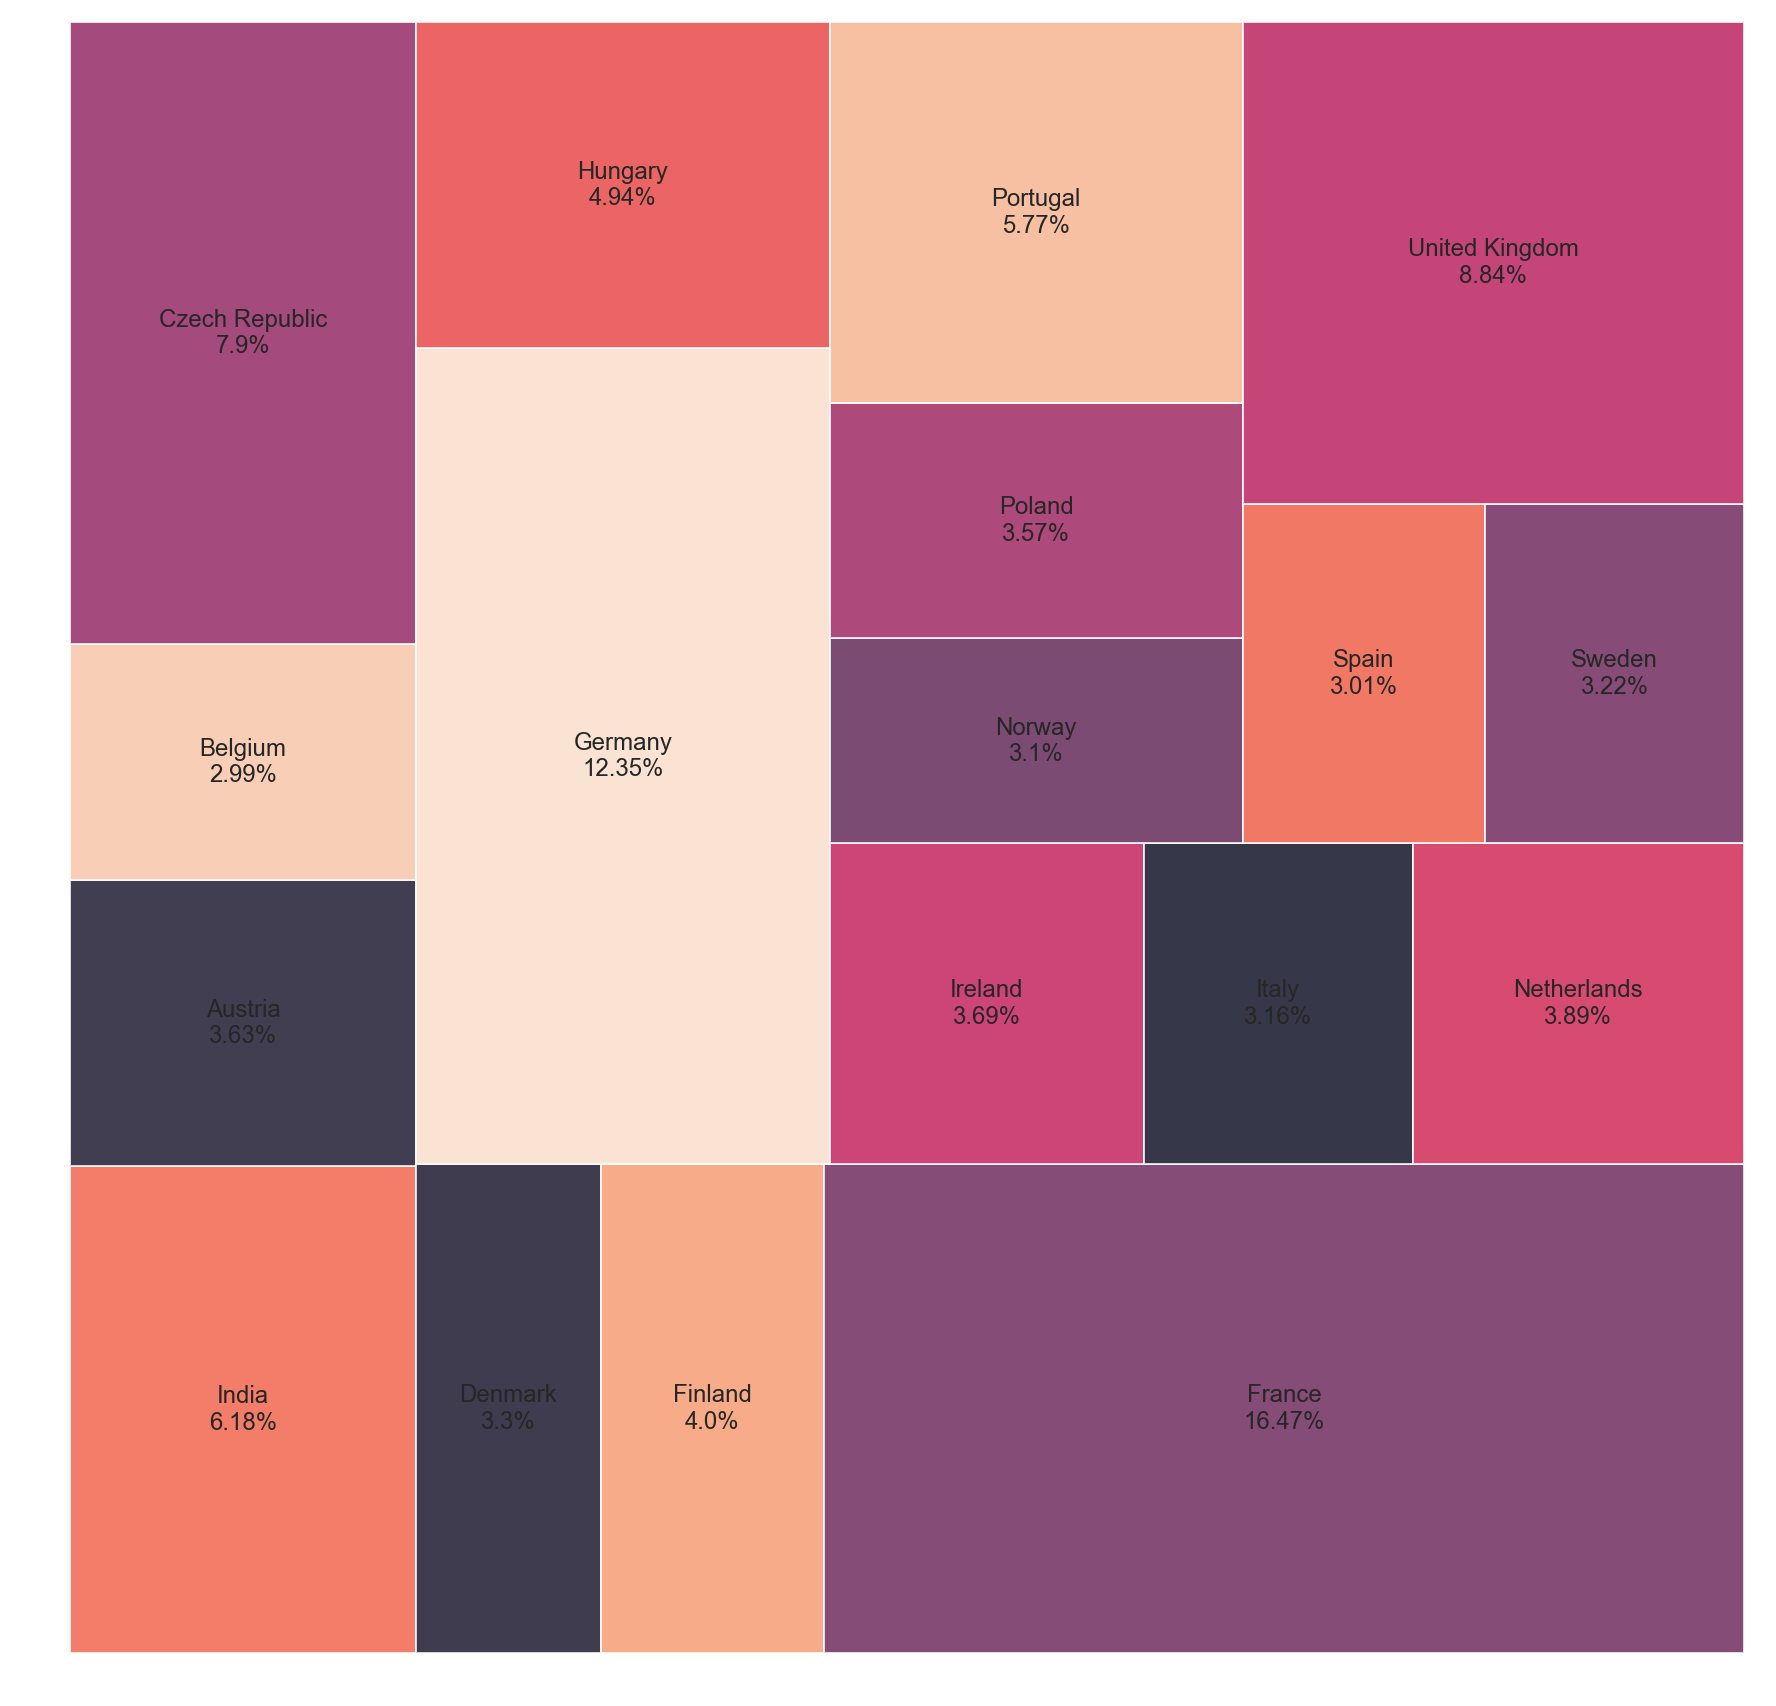

In [62]:
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd

plt.rcParams['figure.figsize']=15,15

squarify.plot(sizes=df2['RSales'], label=df3, alpha=.8)
plt.axis('off')
plt.show()


# Plot Checklist

### Tight Layout

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=4)

for i, ax in enumerate(axes.flat, start=1):
    ax.set_title('Test Axes {}'.format(i))
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')

fig.tight_layout()

plt.show()

### High resolution plot

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(fs,dpi):
    fig, ax=plt.subplots(figsize=fs, dpi=dpi)
    ax.set_title("Figsize: {}, dpi: {}".format(fs,dpi))
    ax.plot([2,4,1,5], label="Label")
    ax.legend()

figsize=(2,2)
for i in range(1,4):
    plot(figsize, i*72)

dpi=72
for i in [2,4,6]:
    plot((i,i), dpi)

In [ ]:
#Figure Size
fig, ax = plt.subplots(figsize=(8, 5.5))
plt.hist(x);

In [ ]:
#Axis labels
ax.set_xlabel("Weight", labelpad=15, fontsize=12, color="#333533");
ax.set_ylabel("Count", labelpad=15, fontsize=12, color="#333533");

In [ ]:
#Colors
plt.hist(x, color="#073642");

In [ ]:
#High quality plots in Jupyter Notebook, use in cell before any plot
%config InlineBackend.figure_format = 'retina'

# Formatting Options

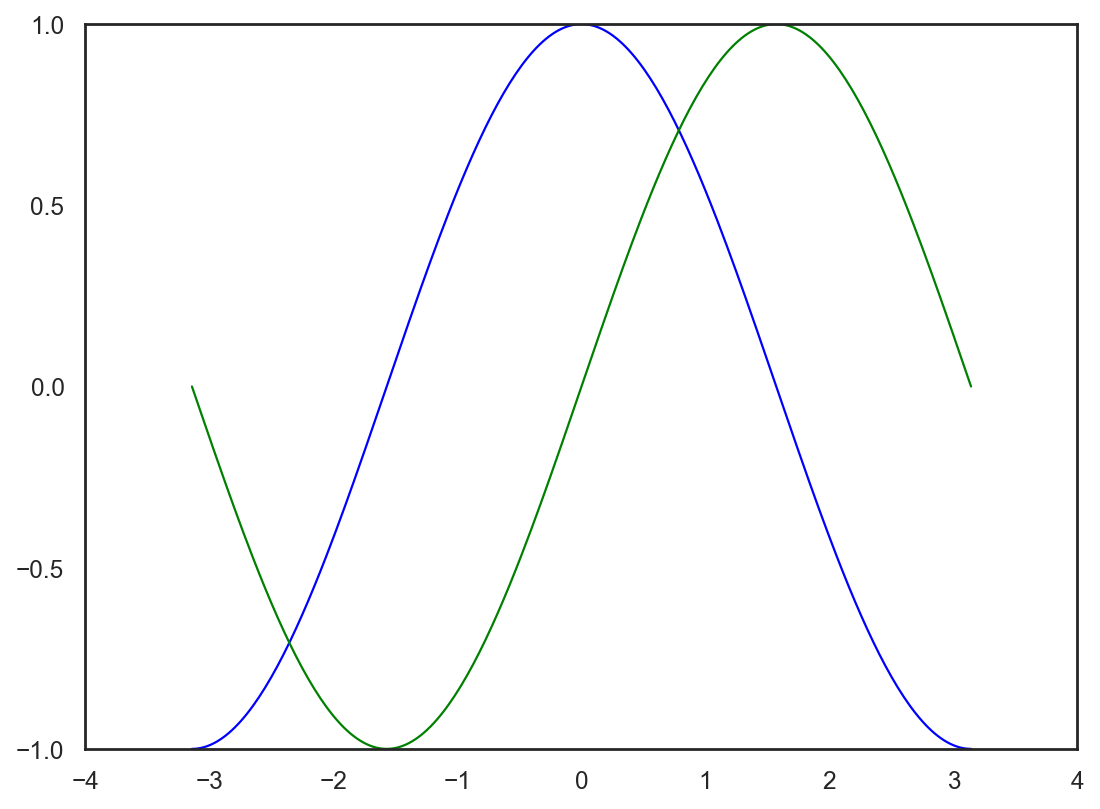

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Set y limits
plt.ylim(-1.0, 1.0)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

### Colors and line widths

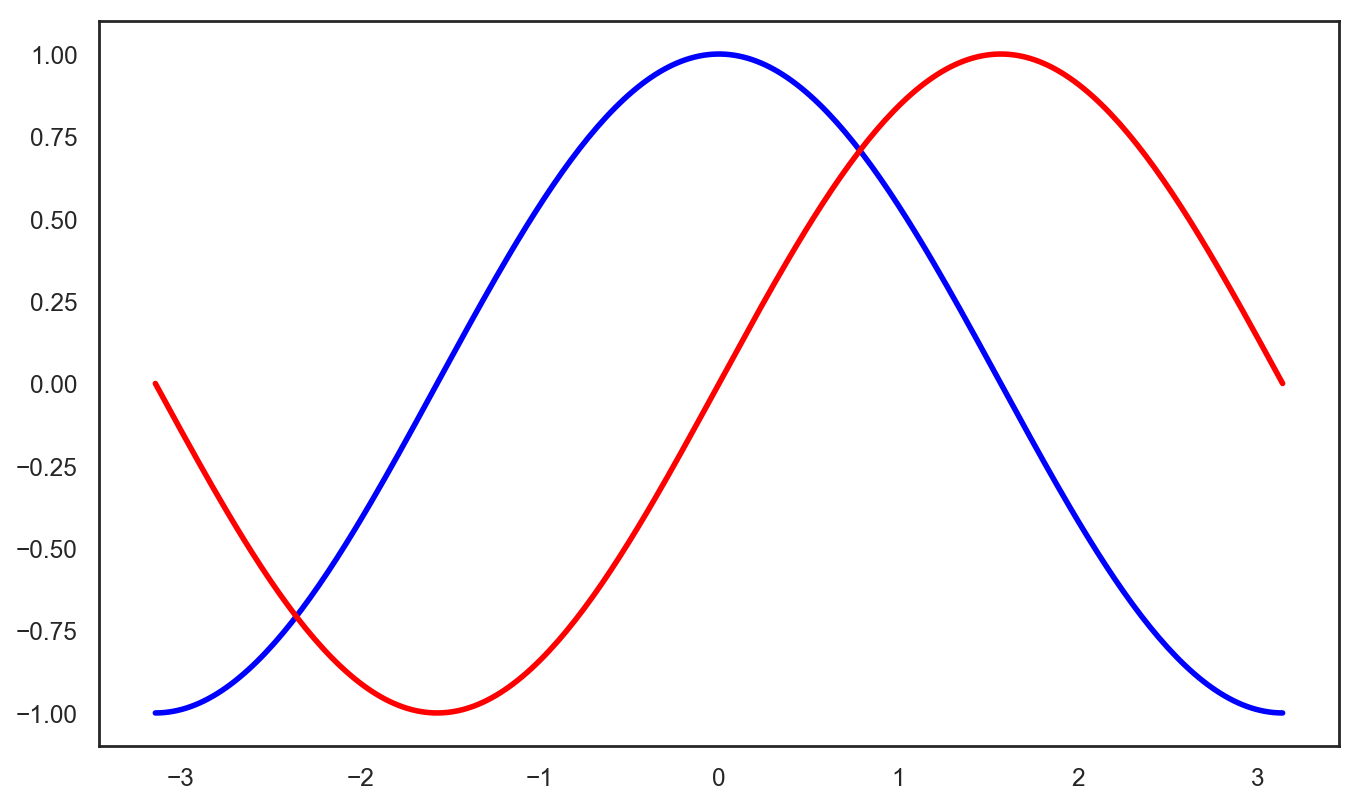

In [73]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

### Setting limits

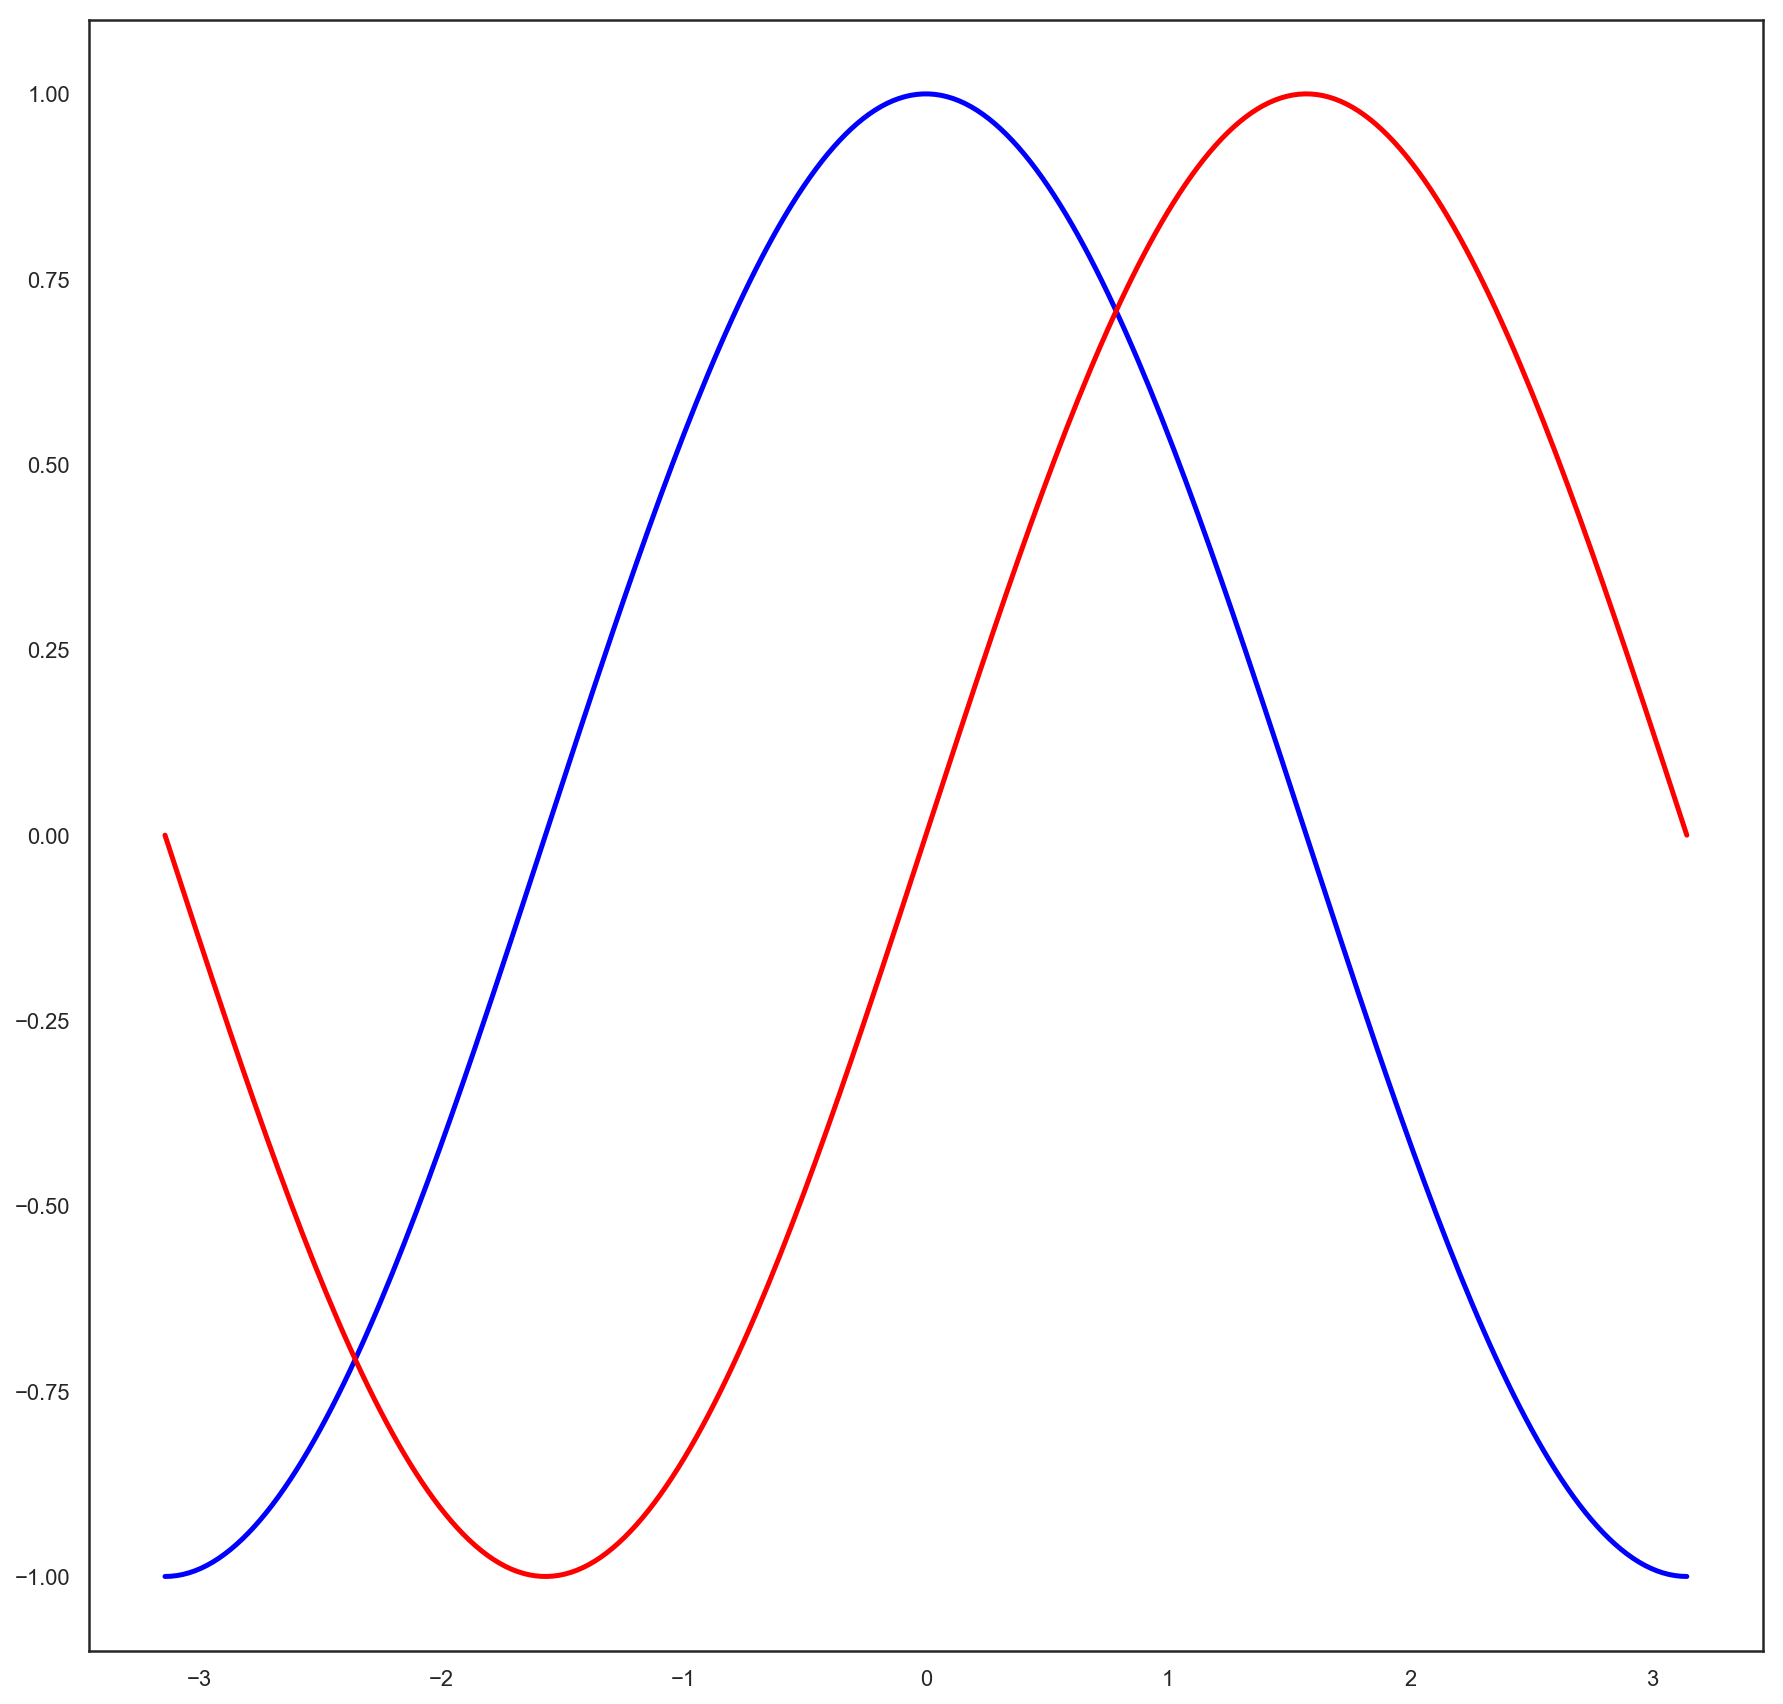

In [75]:
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

### Setting ticks

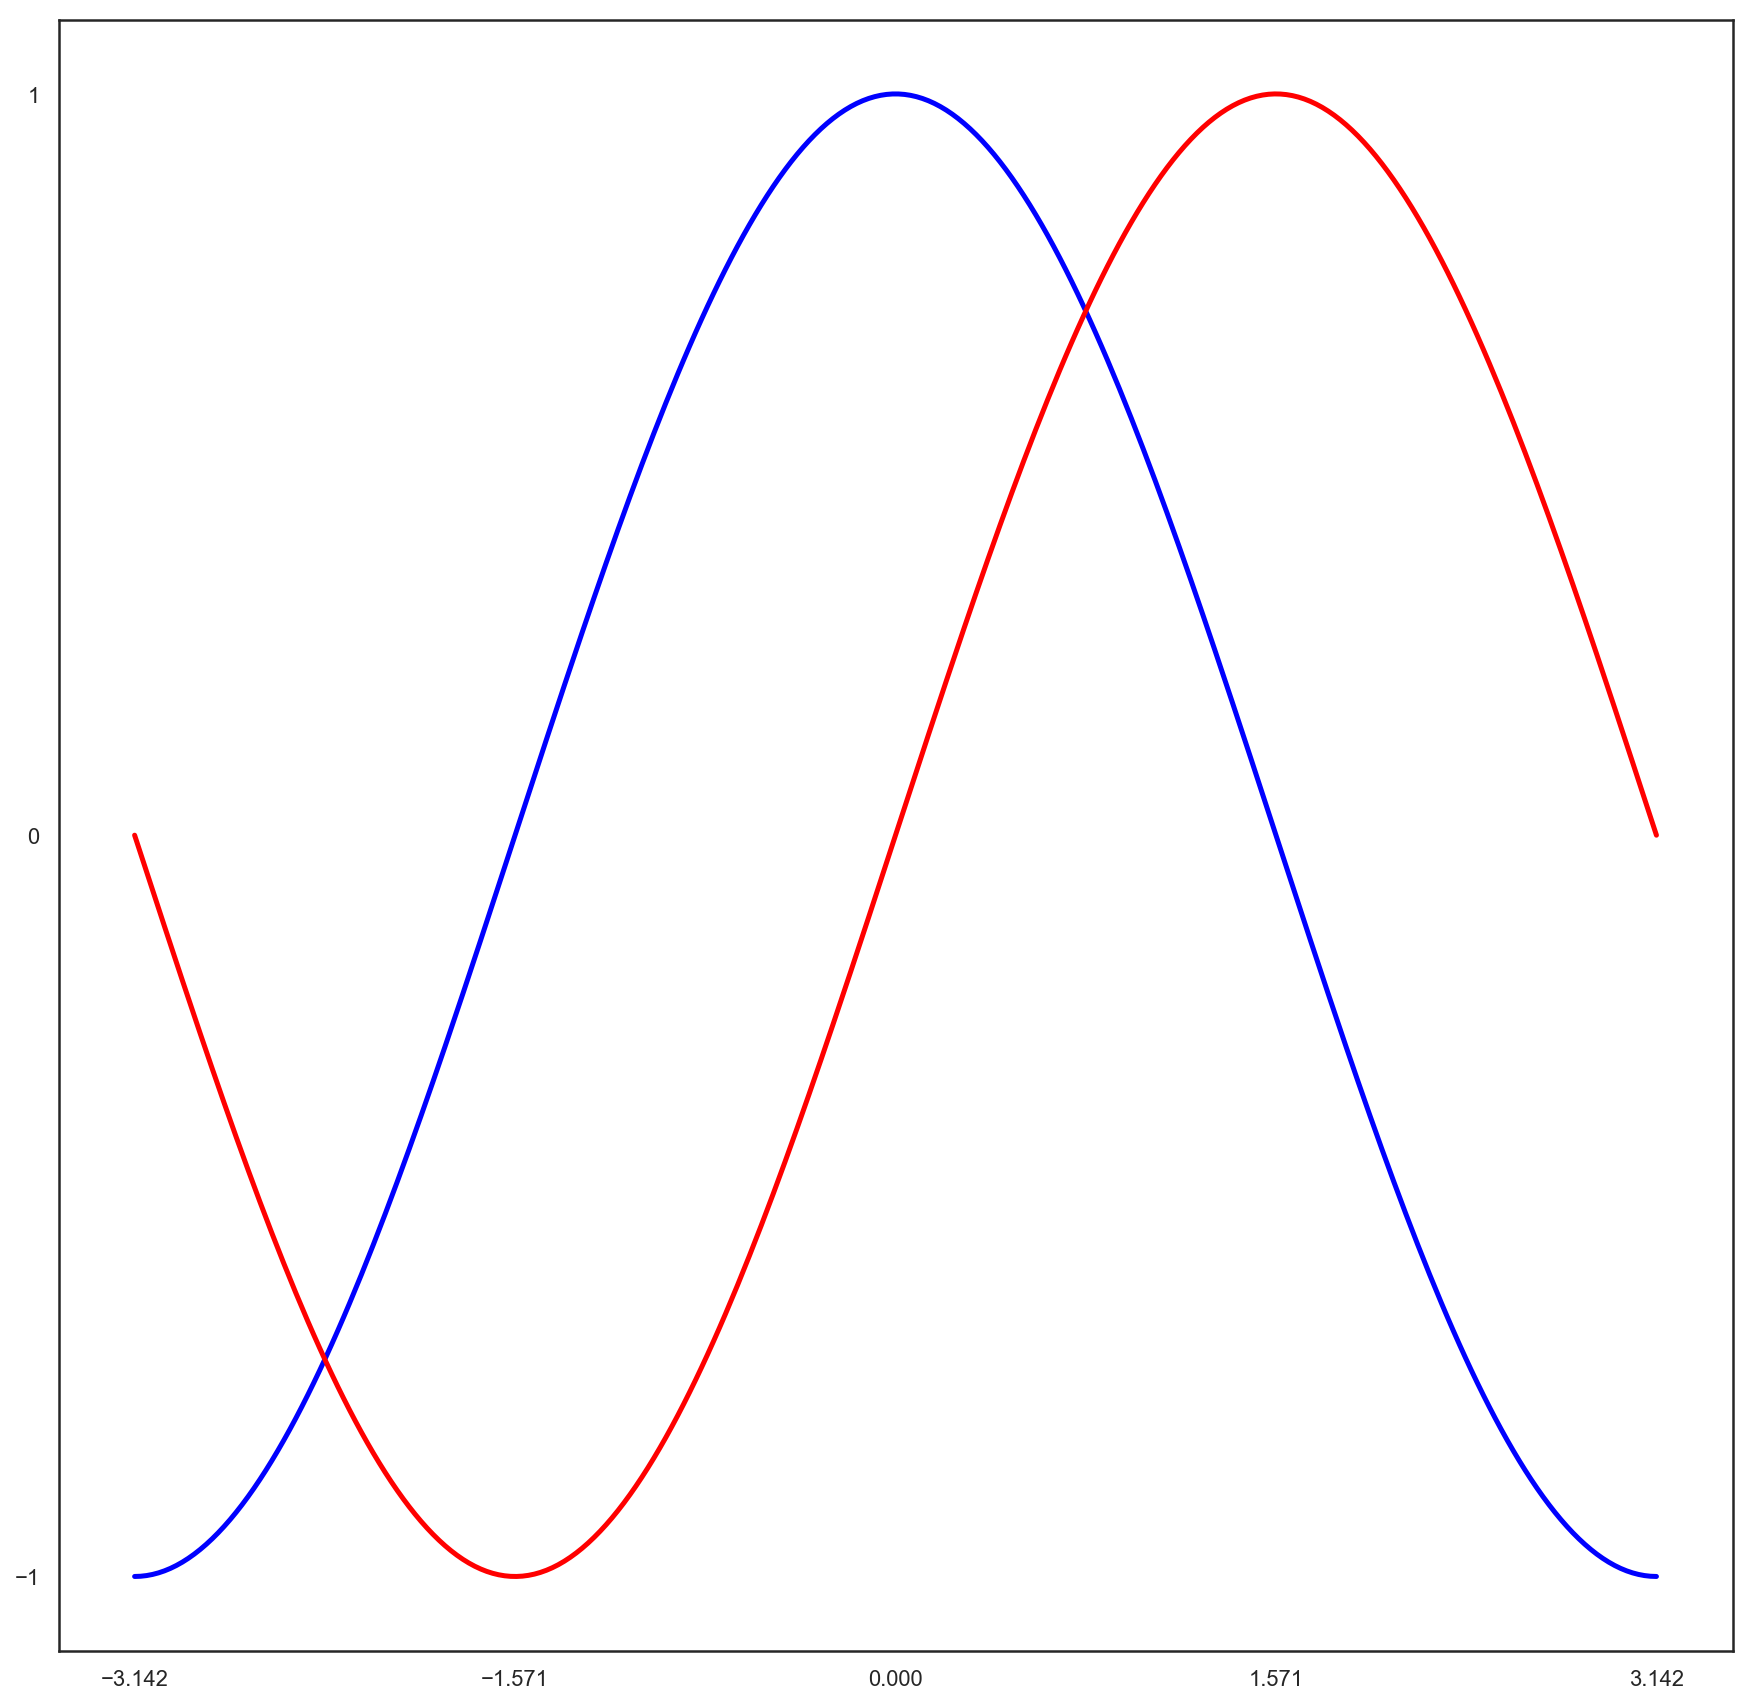

In [78]:
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

### Setting tick labels

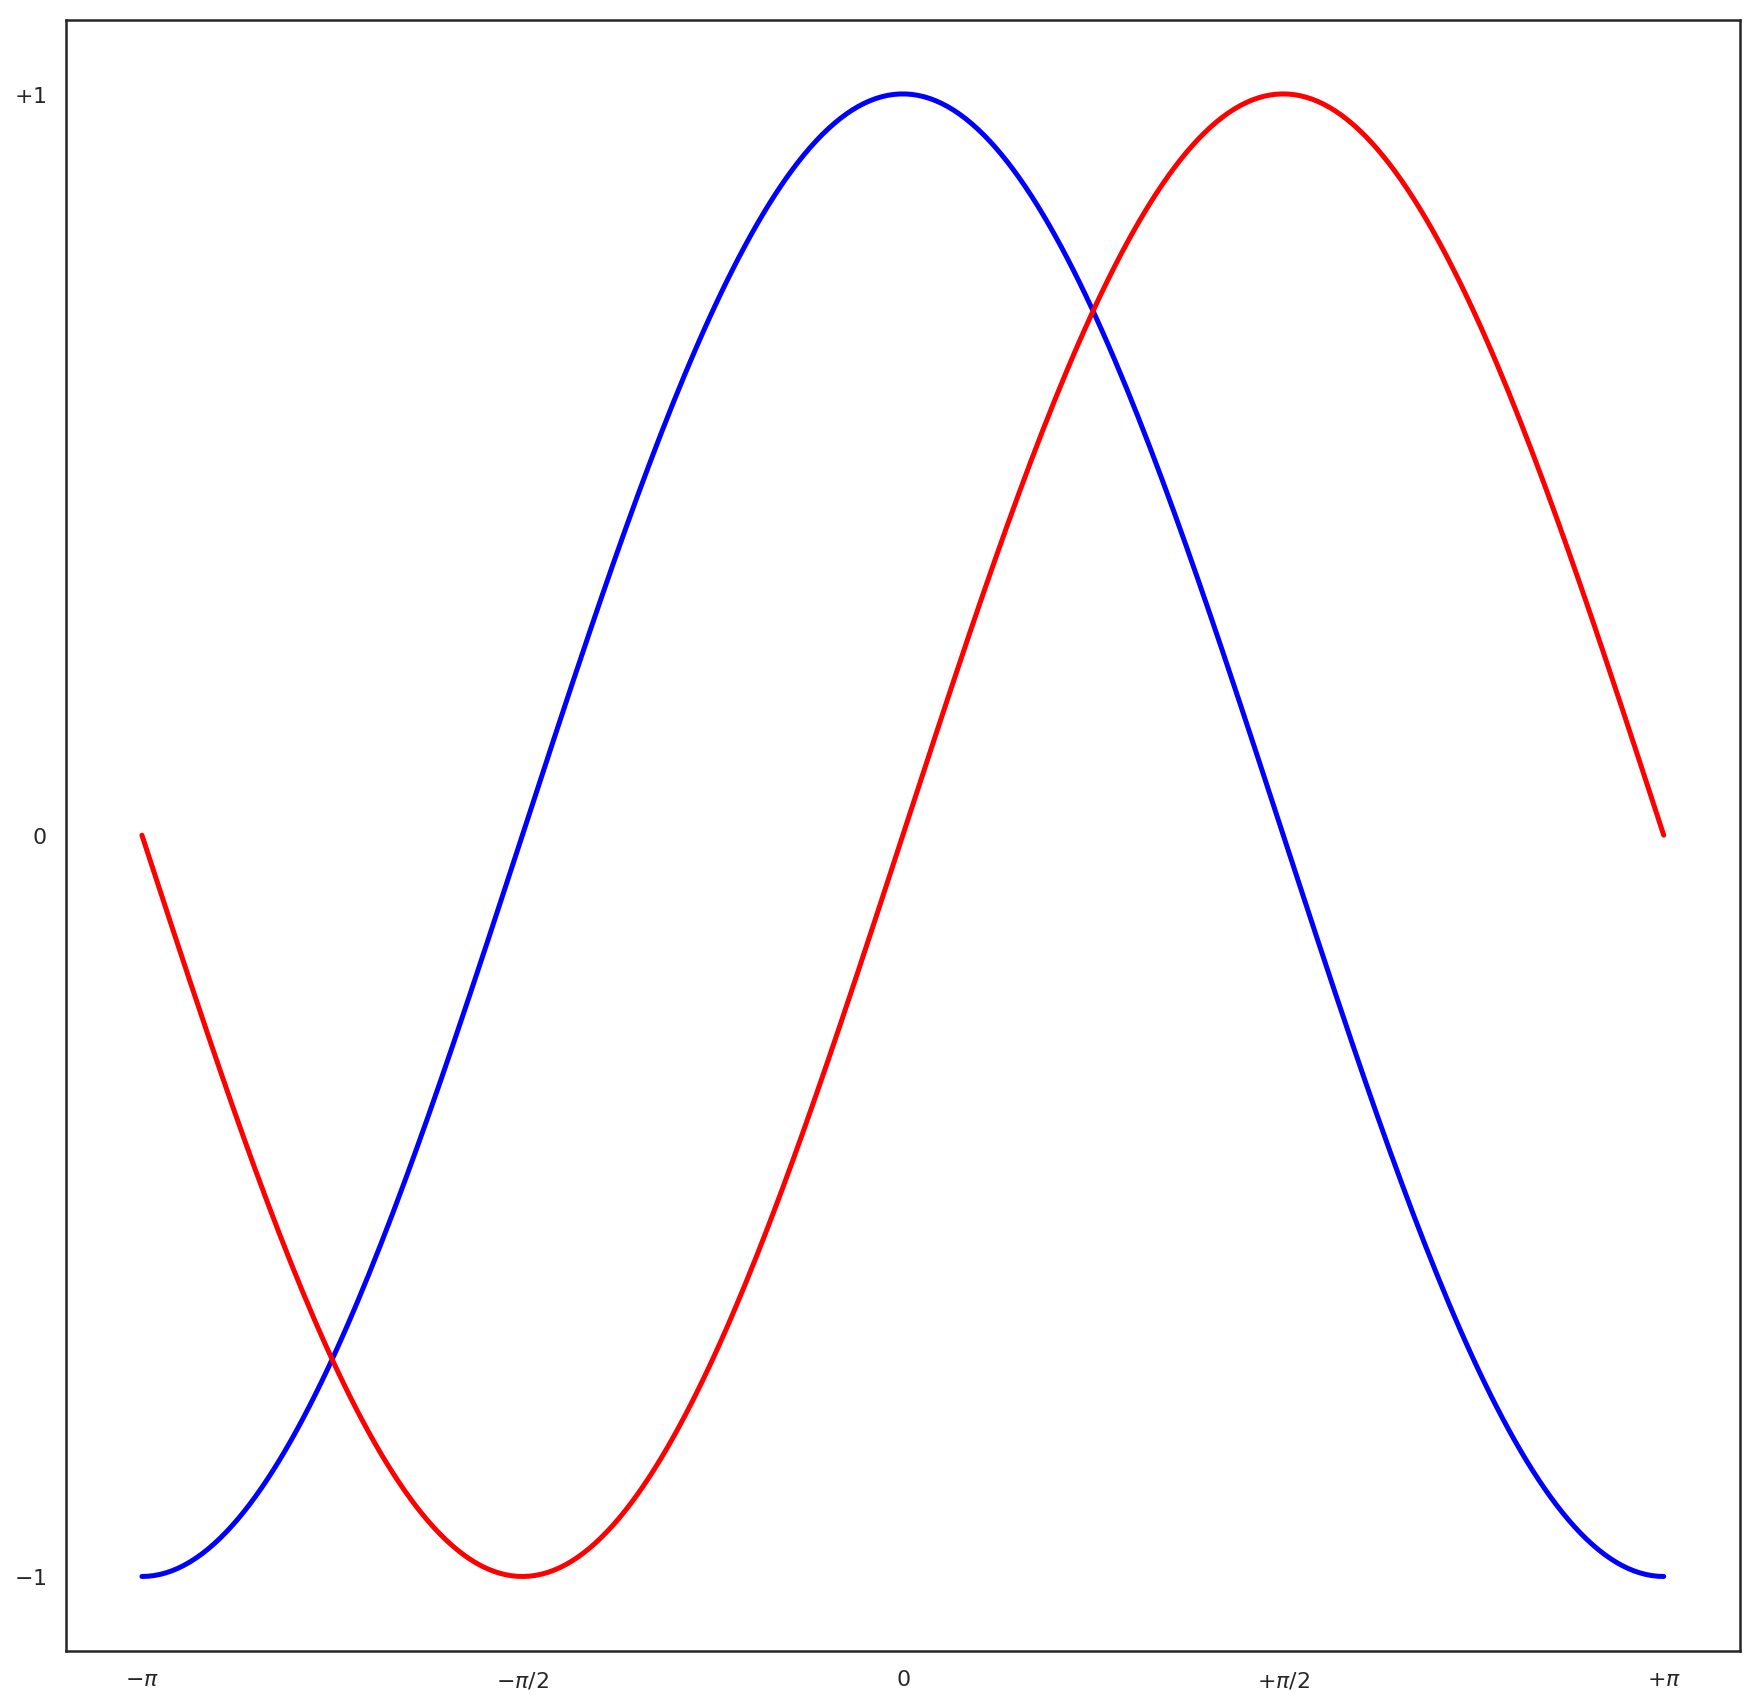

In [79]:
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

### Moving spines

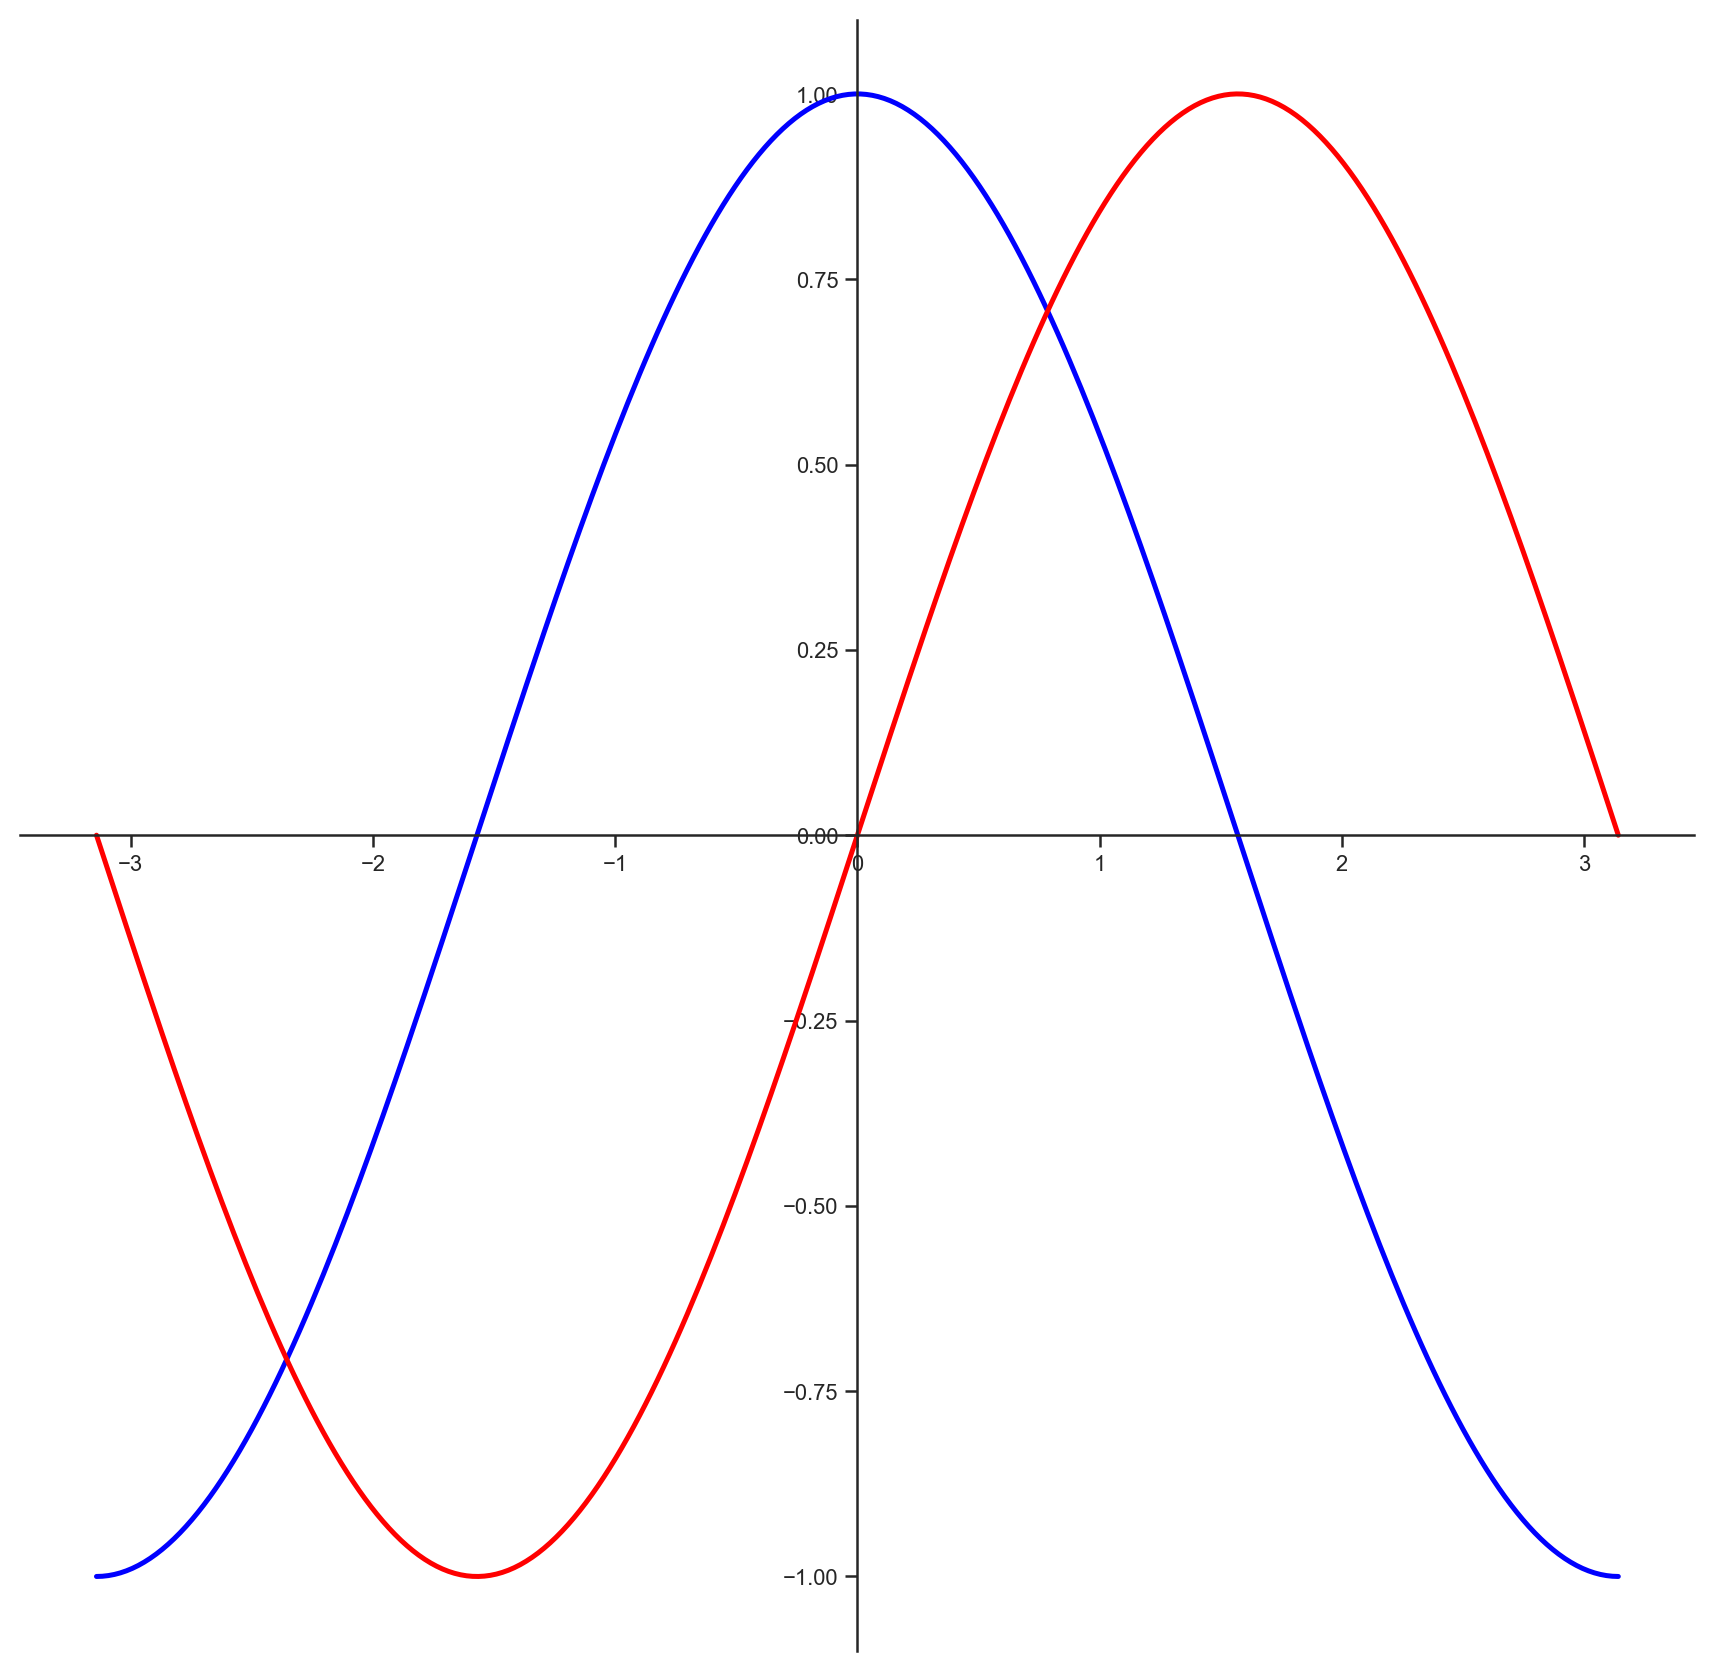

In [81]:
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

### Adding a legend

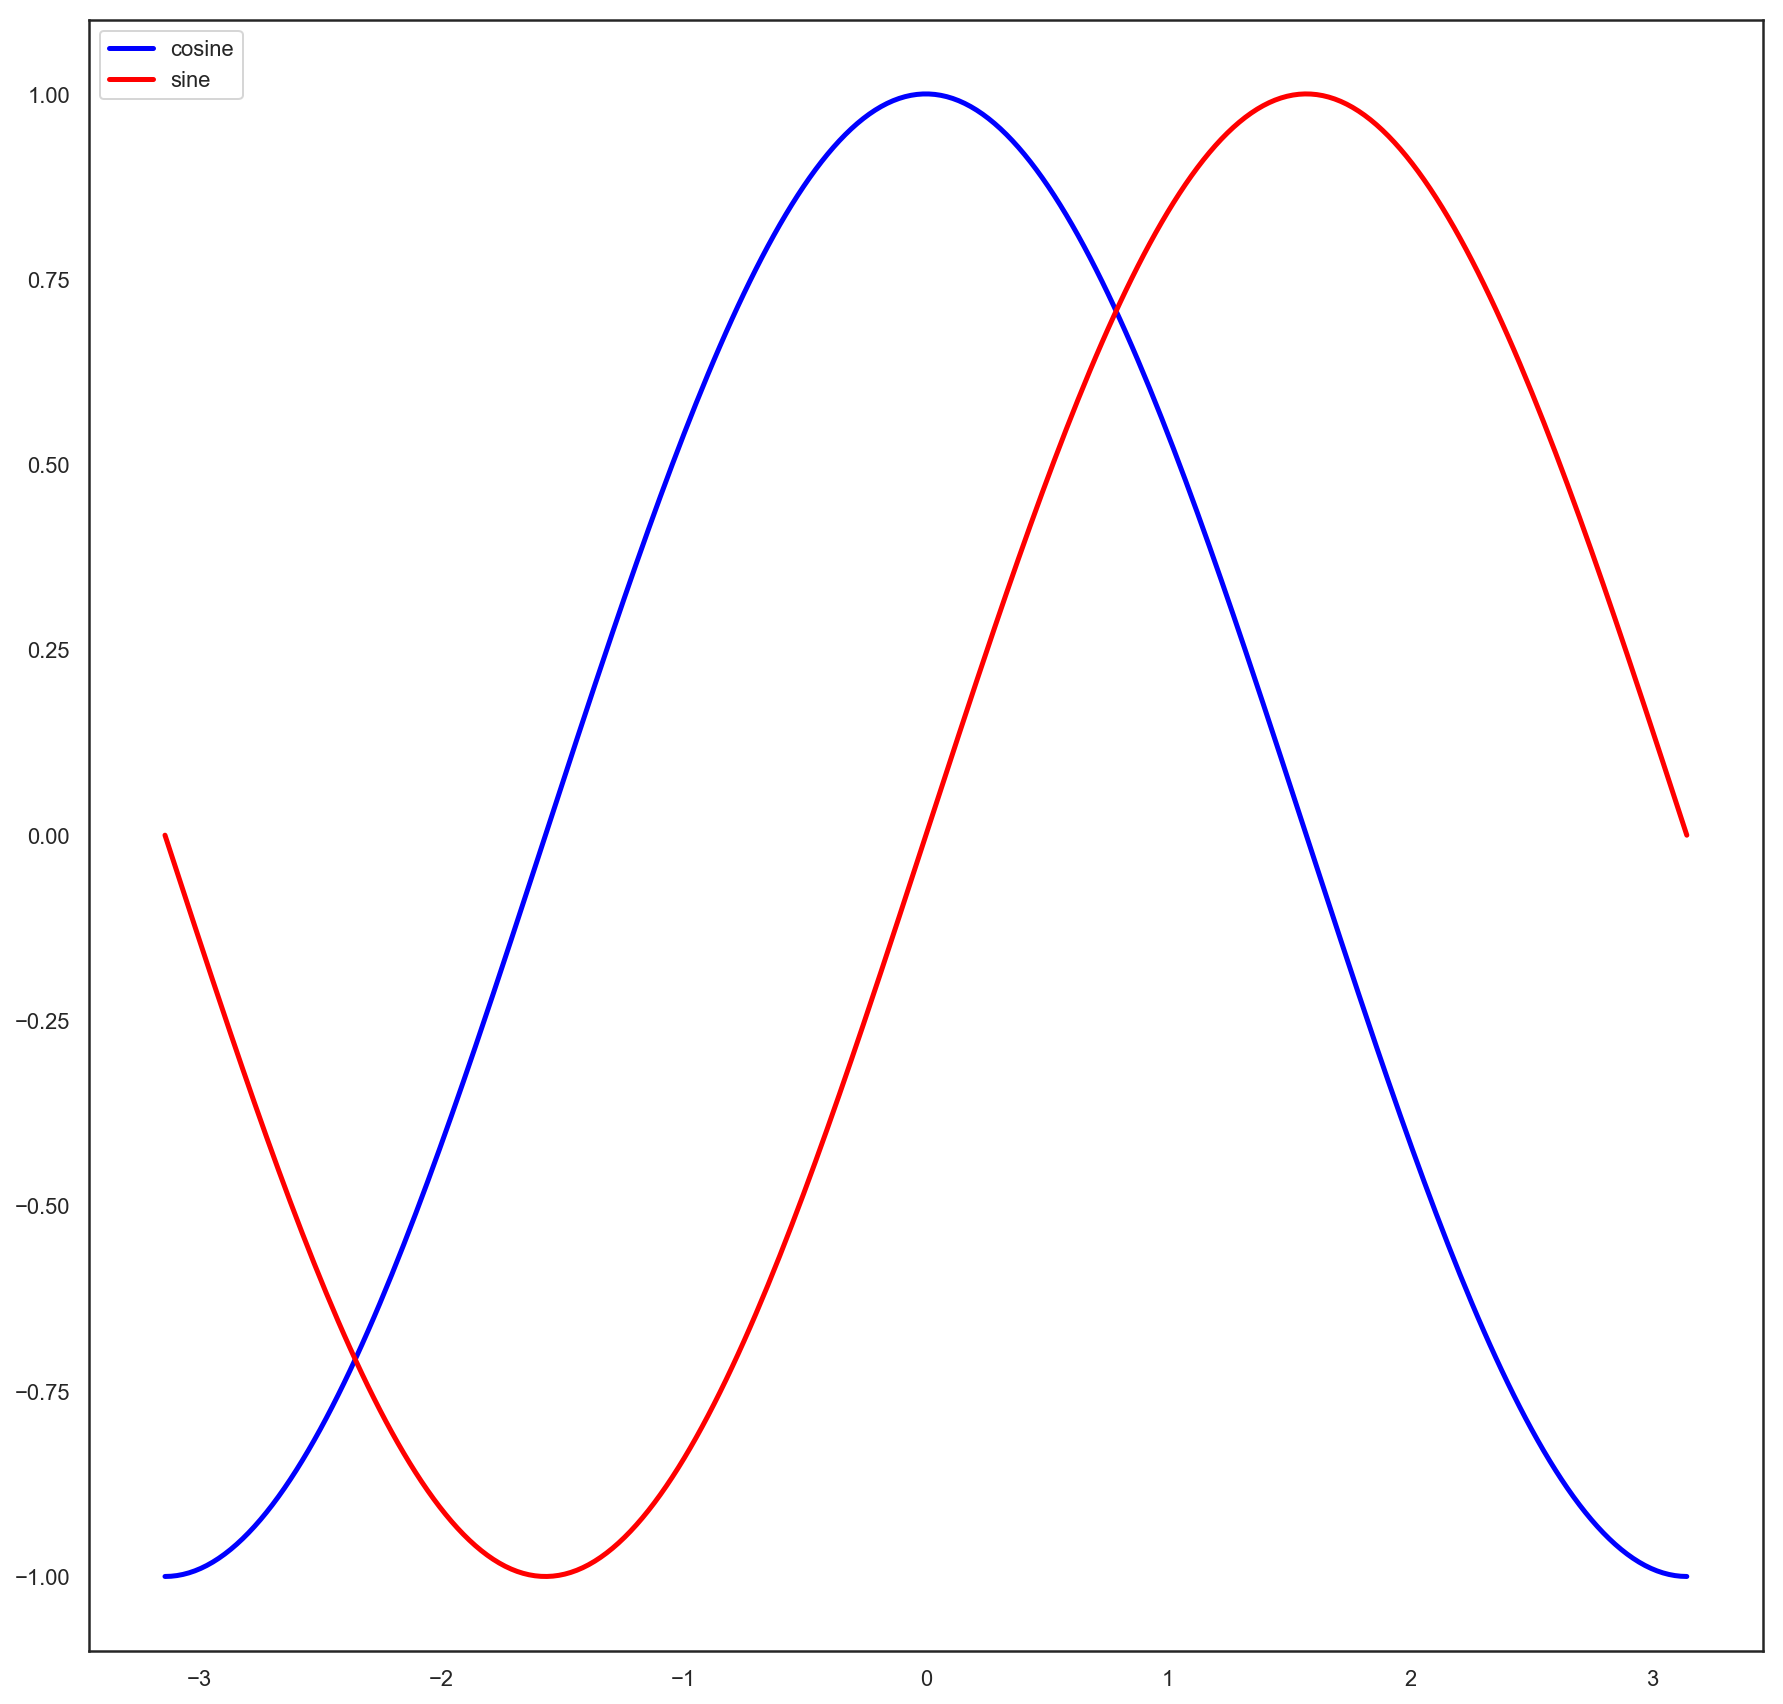

In [85]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")
plt.legend(loc='upper left')

### Annotating some points

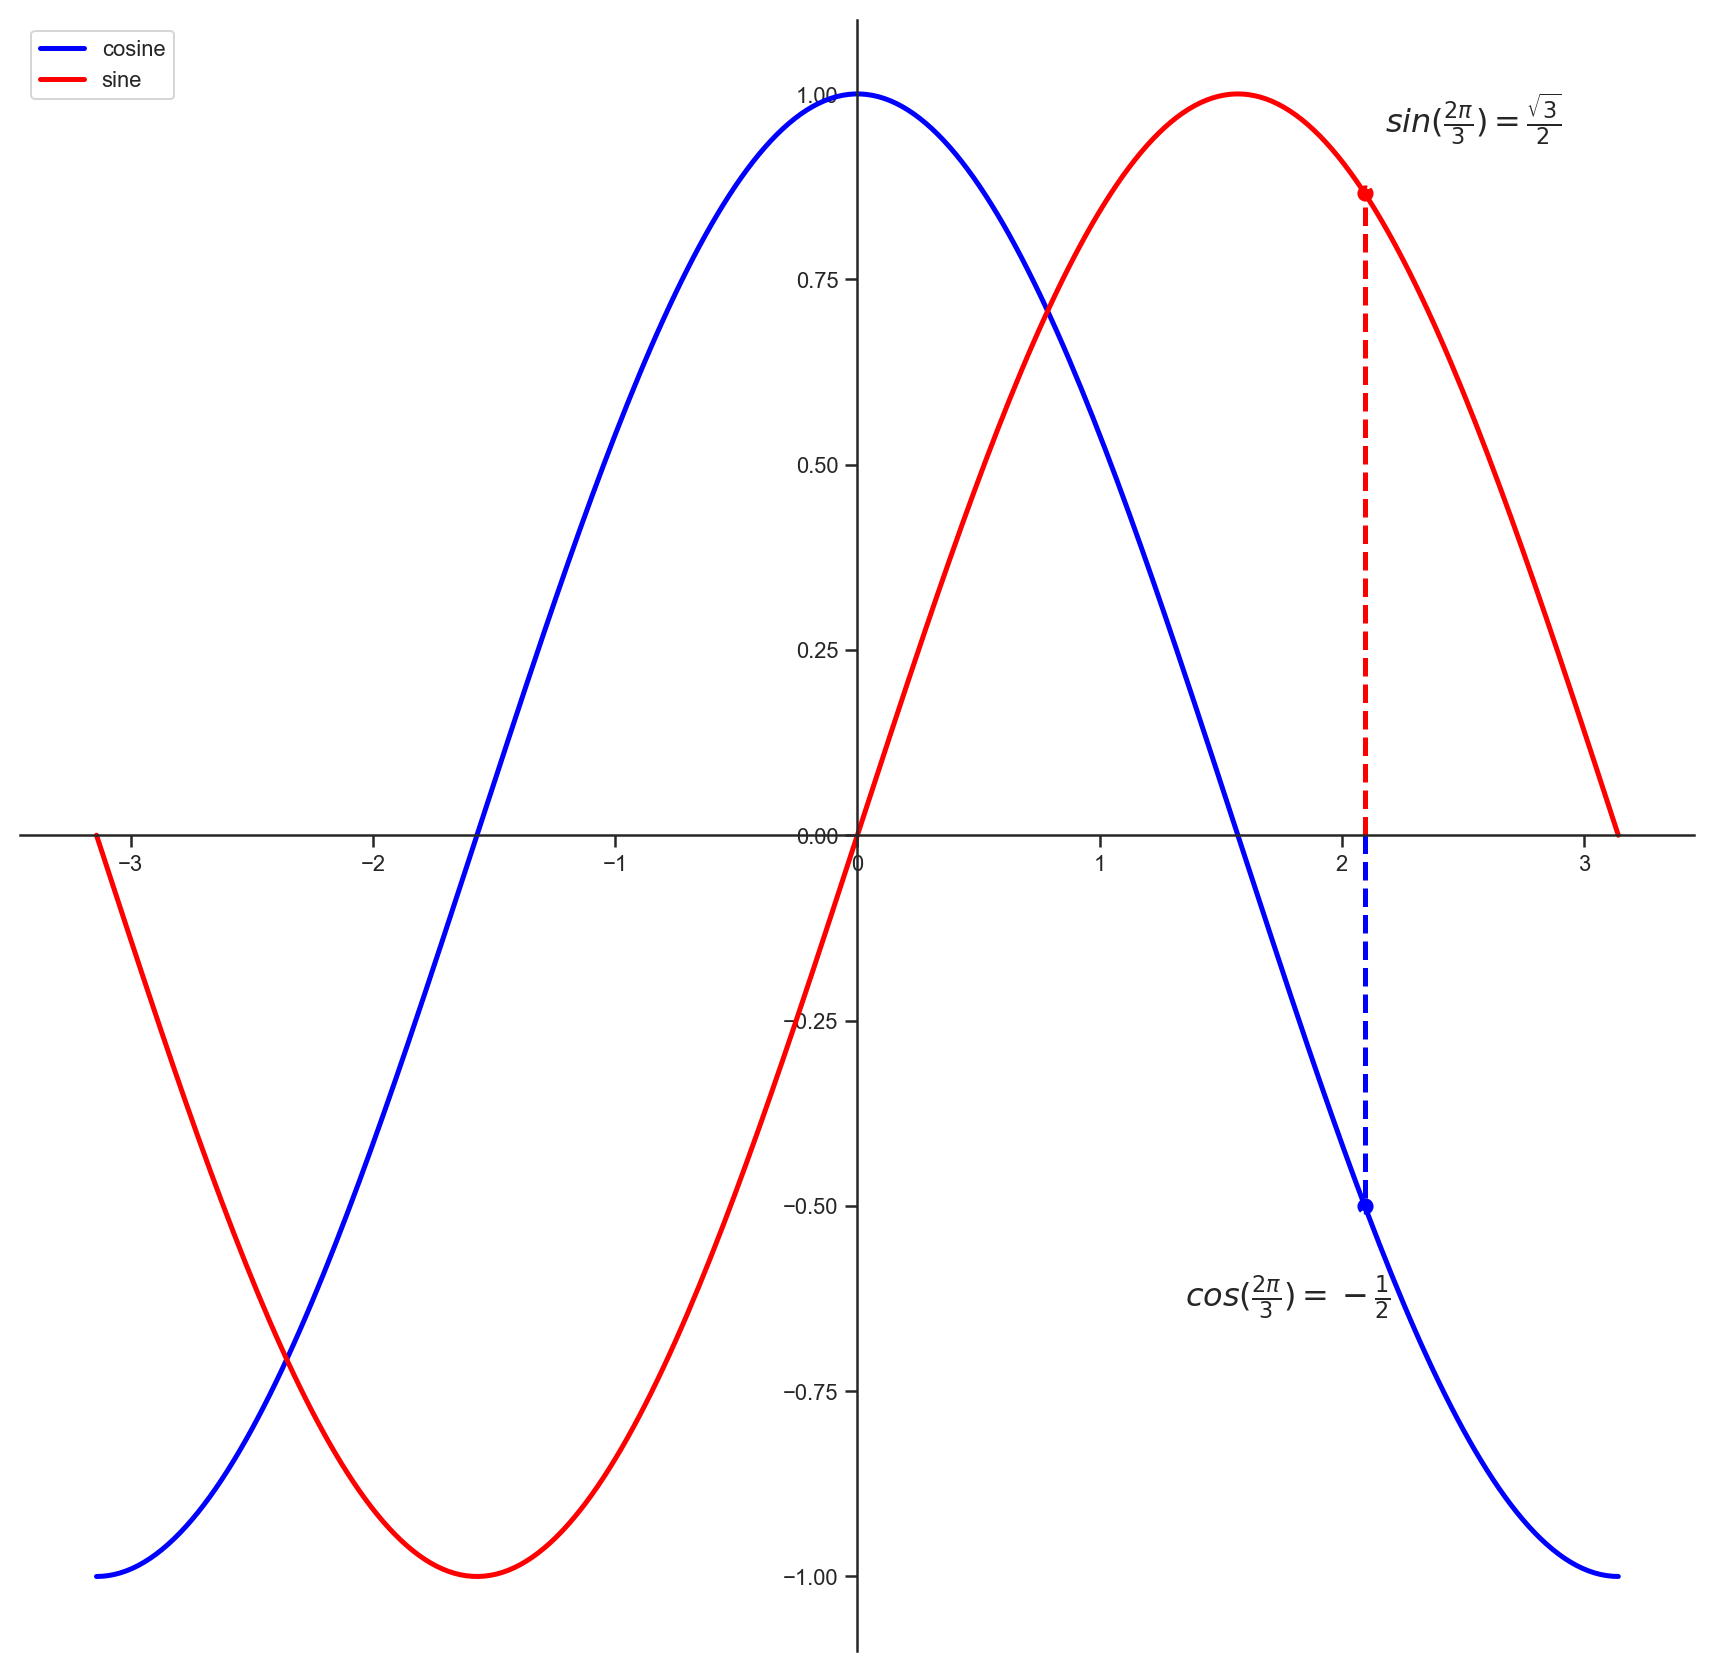

In [88]:
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")
plt.legend(loc='upper left')